# Exercises for Lecture 13 (Training deep neural networks)

In [1]:
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Exercise 1: Build a deep neural network with ELU activation functions and batch normalisation and apply it to fashion MINST.

How good of an accuracy can you achieve on the test set?

In [2]:
import tensorflow as tf
from tensorflow import keras
from functools import partial

# to make this notebook's output stable across runs
def reset_state(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

2024-01-10 00:24:10.083159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 00:24:10.134488: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 00:24:10.135575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-01-10 00:24:10.933788: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.legacy.SGD(lr=1e-3),
              metrics=["accuracy"])

/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 flatten (Flatten)           (None, 784)               0         


 dense (Dense)               (None, 100)               78500     


 batch_normalization (Batch  (None, 100)               400       


 Normalization)                                                  


 dense_1 (Dense)             (None, 100)               10100     


 batch_normalization_1 (Bat  (None, 100)               400       


 chNormalization)                                                


 dense_2 (Dense)             (None, 100)               10100     


 batch_normalization_2 (Bat  (None, 100)               400       


 chNormalization)                                                


 dense_3 (Dense)             (None, 100)               10100     


 batch_normalization_3 (Bat  (None, 100)               400       


 chNormalization)                                                


 dense_4 (Dense)             (None, 100)               10100     


 batch_normalization_4 (Bat  (None, 100)               400       


 chNormalization)                                                


 dense_5 (Dense)             (None, 100)               10100     


 batch_normalization_5 (Bat  (None, 100)               400       


 chNormalization)                                                


 dense_6 (Dense)             (None, 100)               10100     


 batch_normalization_6 (Bat  (None, 100)               400       


 chNormalization)                                                


 dense_7 (Dense)             (None, 100)               10100     


 batch_normalization_7 (Bat  (None, 100)               400       


 chNormalization)                                                


 dense_8 (Dense)             (None, 100)               10100     


 batch_normalization_8 (Bat  (None, 100)               400       


 chNormalization)                                                


 dense_9 (Dense)             (None, 100)               10100     


 batch_normalization_9 (Bat  (None, 100)               400       


 chNormalization)                                                


 dense_10 (Dense)            (None, 100)               10100     


 batch_normalization_10 (Ba  (None, 100)               400       


 tchNormalization)                                               


 dense_11 (Dense)            (None, 100)               10100     


 batch_normalization_11 (Ba  (None, 100)               400       


 tchNormalization)                                               


 dense_12 (Dense)            (None, 100)               10100     


 batch_normalization_12 (Ba  (None, 100)               400       


 tchNormalization)                                               


 dense_13 (Dense)            (None, 100)               10100     


 batch_normalization_13 (Ba  (None, 100)               400       


 tchNormalization)                                               


 dense_14 (Dense)            (None, 100)               10100     


 batch_normalization_14 (Ba  (None, 100)               400       


 tchNormalization)                                               


 dense_15 (Dense)            (None, 100)               10100     


 batch_normalization_15 (Ba  (None, 100)               400       


 tchNormalization)                                               


 dense_16 (Dense)            (None, 100)               10100     


 batch_normalization_16 (Ba  (None, 100)               400       


 tchNormalization)                                               


 dense_17 (Dense)            (None, 100)               10100     


 batch_normalization_17 (Ba  (None, 100)               400       


 tchNormalization)                                               


 dense_18 (Dense)            (None, 100)               10100     


 batch_normalization_18 (Ba  (None, 100)               400       


 tchNormalization)                                               


 dense_19 (Dense)            (None, 100)               10100     


 batch_normalization_19 (Ba  (None, 100)               400       


 tchNormalization)                                               


 dense_20 (Dense)            (None, 10)                1010      


Total params: 279410 (1.07 MB)


Trainable params: 275410 (1.05 MB)


Non-trainable params: 4000 (15.62 KB)


_________________________________________________________________


In [5]:
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/10


   1/1719 [..............................] - ETA: 1:39:19 - loss: 3.3300 - accuracy: 0.0625

  14/1719 [..............................] - ETA: 6s - loss: 2.9085 - accuracy: 0.1027     

  27/1719 [..............................] - ETA: 6s - loss: 2.7799 - accuracy: 0.1123

  40/1719 [..............................] - ETA: 6s - loss: 2.6956 - accuracy: 0.1344

  53/1719 [..............................] - ETA: 6s - loss: 2.6258 - accuracy: 0.1521

  66/1719 [>.............................] - ETA: 6s - loss: 2.5481 - accuracy: 0.1705

  79/1719 [>.............................] - ETA: 6s - loss: 2.4824 - accuracy: 0.1887

  92/1719 [>.............................] - ETA: 6s - loss: 2.4328 - accuracy: 0.1974

 105/1719 [>.............................] - ETA: 6s - loss: 2.3903 - accuracy: 0.2039

 118/1719 [=>............................] - ETA: 6s - loss: 2.3399 - accuracy: 0.2201

 131/1719 [=>............................] - ETA: 6s - loss: 2.2926 - accuracy: 0.2371

 144/1719 [=>............................] - ETA: 6s - loss: 2.2598 - accuracy: 0.2483

 157/1719 [=>............................] - ETA: 6s - loss: 2.2163 - accuracy: 0.2633

 170/1719 [=>............................] - ETA: 6s - loss: 2.1838 - accuracy: 0.2763

 183/1719 [==>...........................] - ETA: 6s - loss: 2.1469 - accuracy: 0.2898

 196/1719 [==>...........................] - ETA: 6s - loss: 2.1128 - accuracy: 0.3029

 209/1719 [==>...........................] - ETA: 6s - loss: 2.0782 - accuracy: 0.3126

 222/1719 [==>...........................] - ETA: 5s - loss: 2.0549 - accuracy: 0.3207

 235/1719 [===>..........................] - ETA: 5s - loss: 2.0284 - accuracy: 0.3310

 248/1719 [===>..........................] - ETA: 5s - loss: 2.0033 - accuracy: 0.3400

 260/1719 [===>..........................] - ETA: 5s - loss: 1.9795 - accuracy: 0.3474

 273/1719 [===>..........................] - ETA: 5s - loss: 1.9546 - accuracy: 0.3561

 286/1719 [===>..........................] - ETA: 5s - loss: 1.9347 - accuracy: 0.3633

 299/1719 [====>.........................] - ETA: 5s - loss: 1.9180 - accuracy: 0.3697

 311/1719 [====>.........................] - ETA: 5s - loss: 1.8988 - accuracy: 0.3752

 324/1719 [====>.........................] - ETA: 5s - loss: 1.8779 - accuracy: 0.3818

 337/1719 [====>.........................] - ETA: 5s - loss: 1.8599 - accuracy: 0.3870

 350/1719 [=====>........................] - ETA: 5s - loss: 1.8419 - accuracy: 0.3929

 363/1719 [=====>........................] - ETA: 5s - loss: 1.8251 - accuracy: 0.3994

 376/1719 [=====>........................] - ETA: 5s - loss: 1.8093 - accuracy: 0.4048

 389/1719 [=====>........................] - ETA: 5s - loss: 1.7942 - accuracy: 0.4096

 402/1719 [======>.......................] - ETA: 5s - loss: 1.7780 - accuracy: 0.4157

 415/1719 [======>.......................] - ETA: 5s - loss: 1.7630 - accuracy: 0.4203

 428/1719 [======>.......................] - ETA: 5s - loss: 1.7485 - accuracy: 0.4253

 441/1719 [======>.......................] - ETA: 5s - loss: 1.7371 - accuracy: 0.4293

 454/1719 [======>.......................] - ETA: 5s - loss: 1.7239 - accuracy: 0.4337

 467/1719 [=======>......................] - ETA: 5s - loss: 1.7112 - accuracy: 0.4380

 480/1719 [=======>......................] - ETA: 4s - loss: 1.6985 - accuracy: 0.4426

 493/1719 [=======>......................] - ETA: 4s - loss: 1.6830 - accuracy: 0.4477

 505/1719 [=======>......................] - ETA: 4s - loss: 1.6705 - accuracy: 0.4520

 518/1719 [========>.....................] - ETA: 4s - loss: 1.6565 - accuracy: 0.4569

 531/1719 [========>.....................] - ETA: 4s - loss: 1.6440 - accuracy: 0.4615

 544/1719 [========>.....................] - ETA: 4s - loss: 1.6320 - accuracy: 0.4656

 557/1719 [========>.....................] - ETA: 4s - loss: 1.6230 - accuracy: 0.4685

 570/1719 [========>.....................] - ETA: 4s - loss: 1.6119 - accuracy: 0.4728

 583/1719 [=========>....................] - ETA: 4s - loss: 1.6005 - accuracy: 0.4764

 596/1719 [=========>....................] - ETA: 4s - loss: 1.5923 - accuracy: 0.4791

 608/1719 [=========>....................] - ETA: 4s - loss: 1.5829 - accuracy: 0.4822

 621/1719 [=========>....................] - ETA: 4s - loss: 1.5731 - accuracy: 0.4850

 634/1719 [==========>...................] - ETA: 4s - loss: 1.5646 - accuracy: 0.4877

 647/1719 [==========>...................] - ETA: 4s - loss: 1.5547 - accuracy: 0.4913

 660/1719 [==========>...................] - ETA: 4s - loss: 1.5452 - accuracy: 0.4950

 673/1719 [==========>...................] - ETA: 4s - loss: 1.5362 - accuracy: 0.4983

 686/1719 [==========>...................] - ETA: 4s - loss: 1.5271 - accuracy: 0.5012

 699/1719 [===========>..................] - ETA: 4s - loss: 1.5208 - accuracy: 0.5032

 712/1719 [===========>..................] - ETA: 4s - loss: 1.5119 - accuracy: 0.5060

 725/1719 [===========>..................] - ETA: 4s - loss: 1.5034 - accuracy: 0.5091

 738/1719 [===========>..................] - ETA: 3s - loss: 1.4945 - accuracy: 0.5119

 751/1719 [============>.................] - ETA: 3s - loss: 1.4883 - accuracy: 0.5137

 764/1719 [============>.................] - ETA: 3s - loss: 1.4838 - accuracy: 0.5152

 777/1719 [============>.................] - ETA: 3s - loss: 1.4776 - accuracy: 0.5174

 790/1719 [============>.................] - ETA: 3s - loss: 1.4697 - accuracy: 0.5199

 801/1719 [============>.................] - ETA: 3s - loss: 1.4650 - accuracy: 0.5218

 811/1719 [=============>................] - ETA: 3s - loss: 1.4597 - accuracy: 0.5235

 824/1719 [=============>................] - ETA: 3s - loss: 1.4525 - accuracy: 0.5259

 837/1719 [=============>................] - ETA: 3s - loss: 1.4457 - accuracy: 0.5277

 850/1719 [=============>................] - ETA: 3s - loss: 1.4395 - accuracy: 0.5298

 863/1719 [==============>...............] - ETA: 3s - loss: 1.4334 - accuracy: 0.5319

 876/1719 [==============>...............] - ETA: 3s - loss: 1.4264 - accuracy: 0.5341

 889/1719 [==============>...............] - ETA: 3s - loss: 1.4200 - accuracy: 0.5363

 902/1719 [==============>...............] - ETA: 3s - loss: 1.4149 - accuracy: 0.5381

 915/1719 [==============>...............] - ETA: 3s - loss: 1.4080 - accuracy: 0.5407

 928/1719 [===============>..............] - ETA: 3s - loss: 1.4024 - accuracy: 0.5426

 941/1719 [===============>..............] - ETA: 3s - loss: 1.3964 - accuracy: 0.5445

 954/1719 [===============>..............] - ETA: 3s - loss: 1.3909 - accuracy: 0.5465

 967/1719 [===============>..............] - ETA: 3s - loss: 1.3850 - accuracy: 0.5485

 980/1719 [================>.............] - ETA: 2s - loss: 1.3783 - accuracy: 0.5507

 993/1719 [================>.............] - ETA: 2s - loss: 1.3737 - accuracy: 0.5521

1005/1719 [================>.............] - ETA: 2s - loss: 1.3690 - accuracy: 0.5537

1018/1719 [================>.............] - ETA: 2s - loss: 1.3637 - accuracy: 0.5552

1030/1719 [================>.............] - ETA: 2s - loss: 1.3595 - accuracy: 0.5568

1043/1719 [=================>............] - ETA: 2s - loss: 1.3548 - accuracy: 0.5585

1056/1719 [=================>............] - ETA: 2s - loss: 1.3508 - accuracy: 0.5596

1068/1719 [=================>............] - ETA: 2s - loss: 1.3461 - accuracy: 0.5609

1081/1719 [=================>............] - ETA: 2s - loss: 1.3400 - accuracy: 0.5630

1094/1719 [==================>...........] - ETA: 2s - loss: 1.3350 - accuracy: 0.5647

1106/1719 [==================>...........] - ETA: 2s - loss: 1.3302 - accuracy: 0.5661

1119/1719 [==================>...........] - ETA: 2s - loss: 1.3257 - accuracy: 0.5677

1132/1719 [==================>...........] - ETA: 2s - loss: 1.3212 - accuracy: 0.5692

1145/1719 [==================>...........] - ETA: 2s - loss: 1.3162 - accuracy: 0.5706

1158/1719 [===================>..........] - ETA: 2s - loss: 1.3120 - accuracy: 0.5721

1171/1719 [===================>..........] - ETA: 2s - loss: 1.3075 - accuracy: 0.5738

1184/1719 [===================>..........] - ETA: 2s - loss: 1.3036 - accuracy: 0.5752

1197/1719 [===================>..........] - ETA: 2s - loss: 1.3002 - accuracy: 0.5764

1210/1719 [====================>.........] - ETA: 2s - loss: 1.2961 - accuracy: 0.5778

1223/1719 [====================>.........] - ETA: 2s - loss: 1.2919 - accuracy: 0.5792

1236/1719 [====================>.........] - ETA: 1s - loss: 1.2875 - accuracy: 0.5804

1249/1719 [====================>.........] - ETA: 1s - loss: 1.2843 - accuracy: 0.5817

1261/1719 [=====================>........] - ETA: 1s - loss: 1.2792 - accuracy: 0.5835

1274/1719 [=====================>........] - ETA: 1s - loss: 1.2764 - accuracy: 0.5845

1286/1719 [=====================>........] - ETA: 1s - loss: 1.2724 - accuracy: 0.5858

1299/1719 [=====================>........] - ETA: 1s - loss: 1.2688 - accuracy: 0.5868

1312/1719 [=====================>........] - ETA: 1s - loss: 1.2645 - accuracy: 0.5882

1325/1719 [======================>.......] - ETA: 1s - loss: 1.2610 - accuracy: 0.5893

1338/1719 [======================>.......] - ETA: 1s - loss: 1.2584 - accuracy: 0.5902

1351/1719 [======================>.......] - ETA: 1s - loss: 1.2547 - accuracy: 0.5914

1364/1719 [======================>.......] - ETA: 1s - loss: 1.2510 - accuracy: 0.5924

1377/1719 [=======================>......] - ETA: 1s - loss: 1.2476 - accuracy: 0.5935

1391/1719 [=======================>......] - ETA: 1s - loss: 1.2440 - accuracy: 0.5946

1404/1719 [=======================>......] - ETA: 1s - loss: 1.2403 - accuracy: 0.5958

1416/1719 [=======================>......] - ETA: 1s - loss: 1.2374 - accuracy: 0.5968

1429/1719 [=======================>......] - ETA: 1s - loss: 1.2347 - accuracy: 0.5978

1442/1719 [========================>.....] - ETA: 1s - loss: 1.2316 - accuracy: 0.5988

1455/1719 [========================>.....] - ETA: 1s - loss: 1.2285 - accuracy: 0.5998

1468/1719 [========================>.....] - ETA: 1s - loss: 1.2250 - accuracy: 0.6006

1481/1719 [========================>.....] - ETA: 0s - loss: 1.2220 - accuracy: 0.6017

1494/1719 [=========================>....] - ETA: 0s - loss: 1.2191 - accuracy: 0.6027

1507/1719 [=========================>....] - ETA: 0s - loss: 1.2162 - accuracy: 0.6037

1519/1719 [=========================>....] - ETA: 0s - loss: 1.2132 - accuracy: 0.6050

1532/1719 [=========================>....] - ETA: 0s - loss: 1.2106 - accuracy: 0.6056

1545/1719 [=========================>....] - ETA: 0s - loss: 1.2078 - accuracy: 0.6066

1558/1719 [==========================>...] - ETA: 0s - loss: 1.2051 - accuracy: 0.6075

1571/1719 [==========================>...] - ETA: 0s - loss: 1.2026 - accuracy: 0.6083

1583/1719 [==========================>...] - ETA: 0s - loss: 1.2006 - accuracy: 0.6090

1595/1719 [==========================>...] - ETA: 0s - loss: 1.1989 - accuracy: 0.6095

1608/1719 [===========================>..] - ETA: 0s - loss: 1.1959 - accuracy: 0.6106

1621/1719 [===========================>..] - ETA: 0s - loss: 1.1938 - accuracy: 0.6113

1634/1719 [===========================>..] - ETA: 0s - loss: 1.1911 - accuracy: 0.6122

1647/1719 [===========================>..] - ETA: 0s - loss: 1.1888 - accuracy: 0.6128

1660/1719 [===========================>..] - ETA: 0s - loss: 1.1864 - accuracy: 0.6135

1673/1719 [============================>.] - ETA: 0s - loss: 1.1833 - accuracy: 0.6146

1685/1719 [============================>.] - ETA: 0s - loss: 1.1804 - accuracy: 0.6157

1698/1719 [============================>.] - ETA: 0s - loss: 1.1773 - accuracy: 0.6167

1711/1719 [============================>.] - ETA: 0s - loss: 1.1745 - accuracy: 0.6175

1719/1719 [==============================] - 11s 5ms/step - loss: 1.1728 - accuracy: 0.6180 - val_loss: 0.6367 - val_accuracy: 0.7936


Epoch 2/10


   1/1719 [..............................] - ETA: 9s - loss: 0.6746 - accuracy: 0.7812

  14/1719 [..............................] - ETA: 6s - loss: 0.8299 - accuracy: 0.7478

  27/1719 [..............................] - ETA: 6s - loss: 0.8384 - accuracy: 0.7292

  39/1719 [..............................] - ETA: 6s - loss: 0.8505 - accuracy: 0.7196

  52/1719 [..............................] - ETA: 6s - loss: 0.8751 - accuracy: 0.7091

  65/1719 [>.............................] - ETA: 6s - loss: 0.8628 - accuracy: 0.7125

  78/1719 [>.............................] - ETA: 6s - loss: 0.8562 - accuracy: 0.7147

  91/1719 [>.............................] - ETA: 6s - loss: 0.8433 - accuracy: 0.7174

 104/1719 [>.............................] - ETA: 6s - loss: 0.8360 - accuracy: 0.7169

 117/1719 [=>............................] - ETA: 6s - loss: 0.8380 - accuracy: 0.7179

 130/1719 [=>............................] - ETA: 6s - loss: 0.8431 - accuracy: 0.7168

 143/1719 [=>............................] - ETA: 6s - loss: 0.8454 - accuracy: 0.7161

 156/1719 [=>............................] - ETA: 6s - loss: 0.8439 - accuracy: 0.7165

 168/1719 [=>............................] - ETA: 6s - loss: 0.8460 - accuracy: 0.7165

 181/1719 [==>...........................] - ETA: 6s - loss: 0.8444 - accuracy: 0.7153

 194/1719 [==>...........................] - ETA: 6s - loss: 0.8443 - accuracy: 0.7167

 207/1719 [==>...........................] - ETA: 6s - loss: 0.8441 - accuracy: 0.7171

 220/1719 [==>...........................] - ETA: 6s - loss: 0.8418 - accuracy: 0.7190

 233/1719 [===>..........................] - ETA: 5s - loss: 0.8388 - accuracy: 0.7209

 246/1719 [===>..........................] - ETA: 5s - loss: 0.8405 - accuracy: 0.7199

 259/1719 [===>..........................] - ETA: 5s - loss: 0.8352 - accuracy: 0.7215

 272/1719 [===>..........................] - ETA: 5s - loss: 0.8292 - accuracy: 0.7243

 284/1719 [===>..........................] - ETA: 5s - loss: 0.8274 - accuracy: 0.7252

 297/1719 [====>.........................] - ETA: 5s - loss: 0.8263 - accuracy: 0.7257

 310/1719 [====>.........................] - ETA: 5s - loss: 0.8271 - accuracy: 0.7255

 323/1719 [====>.........................] - ETA: 5s - loss: 0.8277 - accuracy: 0.7258

 336/1719 [====>.........................] - ETA: 5s - loss: 0.8269 - accuracy: 0.7269

 349/1719 [=====>........................] - ETA: 5s - loss: 0.8273 - accuracy: 0.7266

 362/1719 [=====>........................] - ETA: 5s - loss: 0.8264 - accuracy: 0.7272

 375/1719 [=====>........................] - ETA: 5s - loss: 0.8248 - accuracy: 0.7274

 387/1719 [=====>........................] - ETA: 5s - loss: 0.8224 - accuracy: 0.7271

 400/1719 [=====>........................] - ETA: 5s - loss: 0.8234 - accuracy: 0.7272

 413/1719 [======>.......................] - ETA: 5s - loss: 0.8189 - accuracy: 0.7279

 426/1719 [======>.......................] - ETA: 5s - loss: 0.8170 - accuracy: 0.7288

 439/1719 [======>.......................] - ETA: 5s - loss: 0.8179 - accuracy: 0.7286

 452/1719 [======>.......................] - ETA: 5s - loss: 0.8193 - accuracy: 0.7277

 465/1719 [=======>......................] - ETA: 5s - loss: 0.8176 - accuracy: 0.7278

 478/1719 [=======>......................] - ETA: 5s - loss: 0.8171 - accuracy: 0.7277

 491/1719 [=======>......................] - ETA: 4s - loss: 0.8185 - accuracy: 0.7272

 504/1719 [=======>......................] - ETA: 4s - loss: 0.8164 - accuracy: 0.7281

 517/1719 [========>.....................] - ETA: 4s - loss: 0.8155 - accuracy: 0.7281

 530/1719 [========>.....................] - ETA: 4s - loss: 0.8157 - accuracy: 0.7282

 543/1719 [========>.....................] - ETA: 4s - loss: 0.8149 - accuracy: 0.7286

 556/1719 [========>.....................] - ETA: 4s - loss: 0.8132 - accuracy: 0.7296

 569/1719 [========>.....................] - ETA: 4s - loss: 0.8128 - accuracy: 0.7299

 582/1719 [=========>....................] - ETA: 4s - loss: 0.8152 - accuracy: 0.7292

 594/1719 [=========>....................] - ETA: 4s - loss: 0.8138 - accuracy: 0.7292

 607/1719 [=========>....................] - ETA: 4s - loss: 0.8121 - accuracy: 0.7296

 620/1719 [=========>....................] - ETA: 4s - loss: 0.8113 - accuracy: 0.7298

 632/1719 [==========>...................] - ETA: 4s - loss: 0.8116 - accuracy: 0.7297

 645/1719 [==========>...................] - ETA: 4s - loss: 0.8099 - accuracy: 0.7303

 658/1719 [==========>...................] - ETA: 4s - loss: 0.8100 - accuracy: 0.7301

 671/1719 [==========>...................] - ETA: 4s - loss: 0.8107 - accuracy: 0.7297

 684/1719 [==========>...................] - ETA: 4s - loss: 0.8089 - accuracy: 0.7306

 696/1719 [===========>..................] - ETA: 4s - loss: 0.8097 - accuracy: 0.7303

 709/1719 [===========>..................] - ETA: 4s - loss: 0.8097 - accuracy: 0.7304

 722/1719 [===========>..................] - ETA: 4s - loss: 0.8079 - accuracy: 0.7306

 735/1719 [===========>..................] - ETA: 3s - loss: 0.8076 - accuracy: 0.7307

 748/1719 [============>.................] - ETA: 3s - loss: 0.8065 - accuracy: 0.7312

 761/1719 [============>.................] - ETA: 3s - loss: 0.8048 - accuracy: 0.7318

 774/1719 [============>.................] - ETA: 3s - loss: 0.8027 - accuracy: 0.7326

 787/1719 [============>.................] - ETA: 3s - loss: 0.8023 - accuracy: 0.7328

 800/1719 [============>.................] - ETA: 3s - loss: 0.8017 - accuracy: 0.7325

 813/1719 [=============>................] - ETA: 3s - loss: 0.8028 - accuracy: 0.7320

 826/1719 [=============>................] - ETA: 3s - loss: 0.8021 - accuracy: 0.7321

 839/1719 [=============>................] - ETA: 3s - loss: 0.8001 - accuracy: 0.7328

 852/1719 [=============>................] - ETA: 3s - loss: 0.7995 - accuracy: 0.7330

 865/1719 [==============>...............] - ETA: 3s - loss: 0.7982 - accuracy: 0.7334

 878/1719 [==============>...............] - ETA: 3s - loss: 0.7985 - accuracy: 0.7334

 891/1719 [==============>...............] - ETA: 3s - loss: 0.7977 - accuracy: 0.7333

 904/1719 [==============>...............] - ETA: 3s - loss: 0.7977 - accuracy: 0.7333

 917/1719 [===============>..............] - ETA: 3s - loss: 0.7974 - accuracy: 0.7334

 930/1719 [===============>..............] - ETA: 3s - loss: 0.7962 - accuracy: 0.7338

 943/1719 [===============>..............] - ETA: 3s - loss: 0.7955 - accuracy: 0.7339

 956/1719 [===============>..............] - ETA: 3s - loss: 0.7961 - accuracy: 0.7336

 969/1719 [===============>..............] - ETA: 3s - loss: 0.7953 - accuracy: 0.7341

 982/1719 [================>.............] - ETA: 2s - loss: 0.7947 - accuracy: 0.7341

 995/1719 [================>.............] - ETA: 2s - loss: 0.7955 - accuracy: 0.7337

1008/1719 [================>.............] - ETA: 2s - loss: 0.7944 - accuracy: 0.7340

1021/1719 [================>.............] - ETA: 2s - loss: 0.7939 - accuracy: 0.7338

1034/1719 [=================>............] - ETA: 2s - loss: 0.7924 - accuracy: 0.7345

1047/1719 [=================>............] - ETA: 2s - loss: 0.7927 - accuracy: 0.7344

1060/1719 [=================>............] - ETA: 2s - loss: 0.7917 - accuracy: 0.7346

1073/1719 [=================>............] - ETA: 2s - loss: 0.7911 - accuracy: 0.7347

1085/1719 [=================>............] - ETA: 2s - loss: 0.7920 - accuracy: 0.7344

1098/1719 [==================>...........] - ETA: 2s - loss: 0.7920 - accuracy: 0.7342

1110/1719 [==================>...........] - ETA: 2s - loss: 0.7915 - accuracy: 0.7341

1123/1719 [==================>...........] - ETA: 2s - loss: 0.7901 - accuracy: 0.7345

1136/1719 [==================>...........] - ETA: 2s - loss: 0.7913 - accuracy: 0.7340

1149/1719 [===================>..........] - ETA: 2s - loss: 0.7917 - accuracy: 0.7339

1162/1719 [===================>..........] - ETA: 2s - loss: 0.7918 - accuracy: 0.7338

1176/1719 [===================>..........] - ETA: 2s - loss: 0.7914 - accuracy: 0.7339

1189/1719 [===================>..........] - ETA: 2s - loss: 0.7902 - accuracy: 0.7343

1203/1719 [===================>..........] - ETA: 2s - loss: 0.7907 - accuracy: 0.7342

1216/1719 [====================>.........] - ETA: 2s - loss: 0.7897 - accuracy: 0.7343

1229/1719 [====================>.........] - ETA: 1s - loss: 0.7898 - accuracy: 0.7344

1242/1719 [====================>.........] - ETA: 1s - loss: 0.7897 - accuracy: 0.7344

1255/1719 [====================>.........] - ETA: 1s - loss: 0.7896 - accuracy: 0.7344

1268/1719 [=====================>........] - ETA: 1s - loss: 0.7888 - accuracy: 0.7346

1281/1719 [=====================>........] - ETA: 1s - loss: 0.7884 - accuracy: 0.7347

1294/1719 [=====================>........] - ETA: 1s - loss: 0.7871 - accuracy: 0.7352

1306/1719 [=====================>........] - ETA: 1s - loss: 0.7860 - accuracy: 0.7355

1319/1719 [======================>.......] - ETA: 1s - loss: 0.7849 - accuracy: 0.7359

1332/1719 [======================>.......] - ETA: 1s - loss: 0.7840 - accuracy: 0.7360

1345/1719 [======================>.......] - ETA: 1s - loss: 0.7830 - accuracy: 0.7365

1358/1719 [======================>.......] - ETA: 1s - loss: 0.7820 - accuracy: 0.7370

1371/1719 [======================>.......] - ETA: 1s - loss: 0.7812 - accuracy: 0.7371

1384/1719 [=======================>......] - ETA: 1s - loss: 0.7802 - accuracy: 0.7374

1397/1719 [=======================>......] - ETA: 1s - loss: 0.7803 - accuracy: 0.7372

1410/1719 [=======================>......] - ETA: 1s - loss: 0.7792 - accuracy: 0.7375

1423/1719 [=======================>......] - ETA: 1s - loss: 0.7782 - accuracy: 0.7379

1436/1719 [========================>.....] - ETA: 1s - loss: 0.7777 - accuracy: 0.7380

1449/1719 [========================>.....] - ETA: 1s - loss: 0.7770 - accuracy: 0.7381

1462/1719 [========================>.....] - ETA: 1s - loss: 0.7760 - accuracy: 0.7384

1475/1719 [========================>.....] - ETA: 0s - loss: 0.7758 - accuracy: 0.7384

1487/1719 [========================>.....] - ETA: 0s - loss: 0.7753 - accuracy: 0.7385

1500/1719 [=========================>....] - ETA: 0s - loss: 0.7735 - accuracy: 0.7392

1513/1719 [=========================>....] - ETA: 0s - loss: 0.7731 - accuracy: 0.7394

1526/1719 [=========================>....] - ETA: 0s - loss: 0.7727 - accuracy: 0.7396

1539/1719 [=========================>....] - ETA: 0s - loss: 0.7709 - accuracy: 0.7400

1552/1719 [==========================>...] - ETA: 0s - loss: 0.7700 - accuracy: 0.7403

1565/1719 [==========================>...] - ETA: 0s - loss: 0.7695 - accuracy: 0.7405

1578/1719 [==========================>...] - ETA: 0s - loss: 0.7689 - accuracy: 0.7407

1590/1719 [==========================>...] - ETA: 0s - loss: 0.7685 - accuracy: 0.7408

1603/1719 [==========================>...] - ETA: 0s - loss: 0.7679 - accuracy: 0.7411

1616/1719 [===========================>..] - ETA: 0s - loss: 0.7676 - accuracy: 0.7412

1629/1719 [===========================>..] - ETA: 0s - loss: 0.7673 - accuracy: 0.7414

1642/1719 [===========================>..] - ETA: 0s - loss: 0.7667 - accuracy: 0.7416

1655/1719 [===========================>..] - ETA: 0s - loss: 0.7660 - accuracy: 0.7418

1668/1719 [============================>.] - ETA: 0s - loss: 0.7648 - accuracy: 0.7421

1681/1719 [============================>.] - ETA: 0s - loss: 0.7649 - accuracy: 0.7419

1694/1719 [============================>.] - ETA: 0s - loss: 0.7645 - accuracy: 0.7422

1707/1719 [============================>.] - ETA: 0s - loss: 0.7643 - accuracy: 0.7421

1719/1719 [==============================] - 7s 4ms/step - loss: 0.7636 - accuracy: 0.7423 - val_loss: 0.5191 - val_accuracy: 0.8228


Epoch 3/10


   1/1719 [..............................] - ETA: 10s - loss: 0.5967 - accuracy: 0.8125

  14/1719 [..............................] - ETA: 6s - loss: 0.6683 - accuracy: 0.7500 

  27/1719 [..............................] - ETA: 6s - loss: 0.7459 - accuracy: 0.7373

  39/1719 [..............................] - ETA: 6s - loss: 0.7561 - accuracy: 0.7324

  51/1719 [..............................] - ETA: 6s - loss: 0.7639 - accuracy: 0.7335

  65/1719 [>.............................] - ETA: 6s - loss: 0.7513 - accuracy: 0.7351

  78/1719 [>.............................] - ETA: 6s - loss: 0.7461 - accuracy: 0.7400

  90/1719 [>.............................] - ETA: 6s - loss: 0.7370 - accuracy: 0.7434

 103/1719 [>.............................] - ETA: 6s - loss: 0.7239 - accuracy: 0.7488

 116/1719 [=>............................] - ETA: 6s - loss: 0.7136 - accuracy: 0.7519

 129/1719 [=>............................] - ETA: 6s - loss: 0.7027 - accuracy: 0.7570

 142/1719 [=>............................] - ETA: 6s - loss: 0.7016 - accuracy: 0.7566

 155/1719 [=>............................] - ETA: 6s - loss: 0.7021 - accuracy: 0.7573

 167/1719 [=>............................] - ETA: 6s - loss: 0.7044 - accuracy: 0.7547

 180/1719 [==>...........................] - ETA: 6s - loss: 0.7077 - accuracy: 0.7545

 193/1719 [==>...........................] - ETA: 6s - loss: 0.7041 - accuracy: 0.7560

 207/1719 [==>...........................] - ETA: 6s - loss: 0.7037 - accuracy: 0.7575

 220/1719 [==>...........................] - ETA: 6s - loss: 0.7013 - accuracy: 0.7587

 233/1719 [===>..........................] - ETA: 5s - loss: 0.6984 - accuracy: 0.7589

 246/1719 [===>..........................] - ETA: 5s - loss: 0.6968 - accuracy: 0.7594

 259/1719 [===>..........................] - ETA: 5s - loss: 0.6953 - accuracy: 0.7594

 272/1719 [===>..........................] - ETA: 5s - loss: 0.6964 - accuracy: 0.7608

 285/1719 [===>..........................] - ETA: 5s - loss: 0.6978 - accuracy: 0.7596

 299/1719 [====>.........................] - ETA: 5s - loss: 0.6979 - accuracy: 0.7600

 312/1719 [====>.........................] - ETA: 5s - loss: 0.6969 - accuracy: 0.7599

 325/1719 [====>.........................] - ETA: 5s - loss: 0.6935 - accuracy: 0.7608

 338/1719 [====>.........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.7613

 351/1719 [=====>........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.7618

 364/1719 [=====>........................] - ETA: 5s - loss: 0.6925 - accuracy: 0.7616

 377/1719 [=====>........................] - ETA: 5s - loss: 0.6933 - accuracy: 0.7614

 390/1719 [=====>........................] - ETA: 5s - loss: 0.6938 - accuracy: 0.7613

 403/1719 [======>.......................] - ETA: 5s - loss: 0.6973 - accuracy: 0.7600

 416/1719 [======>.......................] - ETA: 5s - loss: 0.6953 - accuracy: 0.7608

 428/1719 [======>.......................] - ETA: 5s - loss: 0.6954 - accuracy: 0.7607

 441/1719 [======>.......................] - ETA: 5s - loss: 0.6931 - accuracy: 0.7611

 454/1719 [======>.......................] - ETA: 5s - loss: 0.6922 - accuracy: 0.7609

 467/1719 [=======>......................] - ETA: 5s - loss: 0.6940 - accuracy: 0.7604

 479/1719 [=======>......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.7614

 492/1719 [=======>......................] - ETA: 4s - loss: 0.6924 - accuracy: 0.7605

 505/1719 [=======>......................] - ETA: 4s - loss: 0.6898 - accuracy: 0.7616

 518/1719 [========>.....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.7617

 531/1719 [========>.....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.7614

 543/1719 [========>.....................] - ETA: 4s - loss: 0.6936 - accuracy: 0.7609

 556/1719 [========>.....................] - ETA: 4s - loss: 0.6956 - accuracy: 0.7602

 569/1719 [========>.....................] - ETA: 4s - loss: 0.6948 - accuracy: 0.7604

 582/1719 [=========>....................] - ETA: 4s - loss: 0.6950 - accuracy: 0.7604

 595/1719 [=========>....................] - ETA: 4s - loss: 0.6951 - accuracy: 0.7599

 608/1719 [=========>....................] - ETA: 4s - loss: 0.6952 - accuracy: 0.7596

 621/1719 [=========>....................] - ETA: 4s - loss: 0.6949 - accuracy: 0.7598

 634/1719 [==========>...................] - ETA: 4s - loss: 0.6957 - accuracy: 0.7600

 647/1719 [==========>...................] - ETA: 4s - loss: 0.6969 - accuracy: 0.7595

 660/1719 [==========>...................] - ETA: 4s - loss: 0.6970 - accuracy: 0.7594

 673/1719 [==========>...................] - ETA: 4s - loss: 0.6967 - accuracy: 0.7595

 686/1719 [==========>...................] - ETA: 4s - loss: 0.6959 - accuracy: 0.7601

 699/1719 [===========>..................] - ETA: 4s - loss: 0.6968 - accuracy: 0.7597

 712/1719 [===========>..................] - ETA: 4s - loss: 0.6957 - accuracy: 0.7603

 725/1719 [===========>..................] - ETA: 4s - loss: 0.6969 - accuracy: 0.7599

 738/1719 [===========>..................] - ETA: 3s - loss: 0.6954 - accuracy: 0.7606

 751/1719 [============>.................] - ETA: 3s - loss: 0.6939 - accuracy: 0.7611

 764/1719 [============>.................] - ETA: 3s - loss: 0.6934 - accuracy: 0.7612

 776/1719 [============>.................] - ETA: 3s - loss: 0.6924 - accuracy: 0.7616

 789/1719 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.7619

 802/1719 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.7624

 815/1719 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.7625

 828/1719 [=============>................] - ETA: 3s - loss: 0.6896 - accuracy: 0.7630

 841/1719 [=============>................] - ETA: 3s - loss: 0.6893 - accuracy: 0.7630

 854/1719 [=============>................] - ETA: 3s - loss: 0.6896 - accuracy: 0.7628

 867/1719 [==============>...............] - ETA: 3s - loss: 0.6882 - accuracy: 0.7635

 880/1719 [==============>...............] - ETA: 3s - loss: 0.6881 - accuracy: 0.7637

 893/1719 [==============>...............] - ETA: 3s - loss: 0.6880 - accuracy: 0.7639

 906/1719 [==============>...............] - ETA: 3s - loss: 0.6879 - accuracy: 0.7642

 919/1719 [===============>..............] - ETA: 3s - loss: 0.6876 - accuracy: 0.7647

 932/1719 [===============>..............] - ETA: 3s - loss: 0.6886 - accuracy: 0.7641

 945/1719 [===============>..............] - ETA: 3s - loss: 0.6880 - accuracy: 0.7643

 958/1719 [===============>..............] - ETA: 3s - loss: 0.6891 - accuracy: 0.7639

 971/1719 [===============>..............] - ETA: 3s - loss: 0.6891 - accuracy: 0.7640

 983/1719 [================>.............] - ETA: 2s - loss: 0.6894 - accuracy: 0.7641

 996/1719 [================>.............] - ETA: 2s - loss: 0.6895 - accuracy: 0.7642

1009/1719 [================>.............] - ETA: 2s - loss: 0.6887 - accuracy: 0.7647

1022/1719 [================>.............] - ETA: 2s - loss: 0.6892 - accuracy: 0.7646

1035/1719 [=================>............] - ETA: 2s - loss: 0.6879 - accuracy: 0.7652

1048/1719 [=================>............] - ETA: 2s - loss: 0.6875 - accuracy: 0.7654

1061/1719 [=================>............] - ETA: 2s - loss: 0.6864 - accuracy: 0.7657

1074/1719 [=================>............] - ETA: 2s - loss: 0.6857 - accuracy: 0.7658

1087/1719 [=================>............] - ETA: 2s - loss: 0.6863 - accuracy: 0.7656

1100/1719 [==================>...........] - ETA: 2s - loss: 0.6851 - accuracy: 0.7659

1112/1719 [==================>...........] - ETA: 2s - loss: 0.6847 - accuracy: 0.7660

1125/1719 [==================>...........] - ETA: 2s - loss: 0.6855 - accuracy: 0.7658

1137/1719 [==================>...........] - ETA: 2s - loss: 0.6841 - accuracy: 0.7662

1150/1719 [===================>..........] - ETA: 2s - loss: 0.6838 - accuracy: 0.7664

1163/1719 [===================>..........] - ETA: 2s - loss: 0.6838 - accuracy: 0.7663

1176/1719 [===================>..........] - ETA: 2s - loss: 0.6839 - accuracy: 0.7661

1189/1719 [===================>..........] - ETA: 2s - loss: 0.6841 - accuracy: 0.7662

1202/1719 [===================>..........] - ETA: 2s - loss: 0.6836 - accuracy: 0.7662

1215/1719 [====================>.........] - ETA: 2s - loss: 0.6834 - accuracy: 0.7662

1228/1719 [====================>.........] - ETA: 1s - loss: 0.6836 - accuracy: 0.7663

1241/1719 [====================>.........] - ETA: 1s - loss: 0.6840 - accuracy: 0.7659

1254/1719 [====================>.........] - ETA: 1s - loss: 0.6847 - accuracy: 0.7659

1267/1719 [=====================>........] - ETA: 1s - loss: 0.6854 - accuracy: 0.7658

1279/1719 [=====================>........] - ETA: 1s - loss: 0.6856 - accuracy: 0.7657

1291/1719 [=====================>........] - ETA: 1s - loss: 0.6854 - accuracy: 0.7656

1304/1719 [=====================>........] - ETA: 1s - loss: 0.6851 - accuracy: 0.7657

1317/1719 [=====================>........] - ETA: 1s - loss: 0.6841 - accuracy: 0.7659

1329/1719 [======================>.......] - ETA: 1s - loss: 0.6833 - accuracy: 0.7662

1342/1719 [======================>.......] - ETA: 1s - loss: 0.6829 - accuracy: 0.7664

1355/1719 [======================>.......] - ETA: 1s - loss: 0.6828 - accuracy: 0.7665

1367/1719 [======================>.......] - ETA: 1s - loss: 0.6826 - accuracy: 0.7665

1380/1719 [=======================>......] - ETA: 1s - loss: 0.6816 - accuracy: 0.7667

1393/1719 [=======================>......] - ETA: 1s - loss: 0.6808 - accuracy: 0.7669

1406/1719 [=======================>......] - ETA: 1s - loss: 0.6811 - accuracy: 0.7670

1419/1719 [=======================>......] - ETA: 1s - loss: 0.6814 - accuracy: 0.7668

1431/1719 [=======================>......] - ETA: 1s - loss: 0.6813 - accuracy: 0.7666

1444/1719 [========================>.....] - ETA: 1s - loss: 0.6805 - accuracy: 0.7668

1457/1719 [========================>.....] - ETA: 1s - loss: 0.6801 - accuracy: 0.7669

1470/1719 [========================>.....] - ETA: 1s - loss: 0.6803 - accuracy: 0.7668

1483/1719 [========================>.....] - ETA: 0s - loss: 0.6802 - accuracy: 0.7669

1496/1719 [=========================>....] - ETA: 0s - loss: 0.6808 - accuracy: 0.7668

1509/1719 [=========================>....] - ETA: 0s - loss: 0.6813 - accuracy: 0.7664

1522/1719 [=========================>....] - ETA: 0s - loss: 0.6810 - accuracy: 0.7663

1534/1719 [=========================>....] - ETA: 0s - loss: 0.6816 - accuracy: 0.7662

1547/1719 [=========================>....] - ETA: 0s - loss: 0.6811 - accuracy: 0.7664

1560/1719 [==========================>...] - ETA: 0s - loss: 0.6808 - accuracy: 0.7667

1573/1719 [==========================>...] - ETA: 0s - loss: 0.6807 - accuracy: 0.7667

1586/1719 [==========================>...] - ETA: 0s - loss: 0.6801 - accuracy: 0.7669

1599/1719 [==========================>...] - ETA: 0s - loss: 0.6795 - accuracy: 0.7670

1612/1719 [===========================>..] - ETA: 0s - loss: 0.6793 - accuracy: 0.7670

1625/1719 [===========================>..] - ETA: 0s - loss: 0.6791 - accuracy: 0.7670

1638/1719 [===========================>..] - ETA: 0s - loss: 0.6790 - accuracy: 0.7671

1651/1719 [===========================>..] - ETA: 0s - loss: 0.6785 - accuracy: 0.7671

1664/1719 [============================>.] - ETA: 0s - loss: 0.6788 - accuracy: 0.7670

1677/1719 [============================>.] - ETA: 0s - loss: 0.6782 - accuracy: 0.7674

1690/1719 [============================>.] - ETA: 0s - loss: 0.6784 - accuracy: 0.7674

1703/1719 [============================>.] - ETA: 0s - loss: 0.6780 - accuracy: 0.7674

1716/1719 [============================>.] - ETA: 0s - loss: 0.6779 - accuracy: 0.7675

1719/1719 [==============================] - 7s 4ms/step - loss: 0.6776 - accuracy: 0.7677 - val_loss: 0.4776 - val_accuracy: 0.8338


Epoch 4/10


   1/1719 [..............................] - ETA: 9s - loss: 0.5972 - accuracy: 0.7812

  14/1719 [..............................] - ETA: 6s - loss: 0.6848 - accuracy: 0.7701

  26/1719 [..............................] - ETA: 6s - loss: 0.6779 - accuracy: 0.7728

  38/1719 [..............................] - ETA: 6s - loss: 0.6542 - accuracy: 0.7747

  51/1719 [..............................] - ETA: 6s - loss: 0.6414 - accuracy: 0.7812

  64/1719 [>.............................] - ETA: 6s - loss: 0.6508 - accuracy: 0.7793

  77/1719 [>.............................] - ETA: 6s - loss: 0.6520 - accuracy: 0.7796

  90/1719 [>.............................] - ETA: 6s - loss: 0.6483 - accuracy: 0.7781

 103/1719 [>.............................] - ETA: 6s - loss: 0.6476 - accuracy: 0.7782

 116/1719 [=>............................] - ETA: 6s - loss: 0.6521 - accuracy: 0.7759

 130/1719 [=>............................] - ETA: 6s - loss: 0.6494 - accuracy: 0.7731

 143/1719 [=>............................] - ETA: 6s - loss: 0.6587 - accuracy: 0.7708

 156/1719 [=>............................] - ETA: 6s - loss: 0.6617 - accuracy: 0.7700

 169/1719 [=>............................] - ETA: 6s - loss: 0.6587 - accuracy: 0.7711

 182/1719 [==>...........................] - ETA: 6s - loss: 0.6581 - accuracy: 0.7706

 194/1719 [==>...........................] - ETA: 6s - loss: 0.6560 - accuracy: 0.7705

 207/1719 [==>...........................] - ETA: 6s - loss: 0.6533 - accuracy: 0.7713

 220/1719 [==>...........................] - ETA: 6s - loss: 0.6607 - accuracy: 0.7700

 233/1719 [===>..........................] - ETA: 6s - loss: 0.6608 - accuracy: 0.7715

 246/1719 [===>..........................] - ETA: 5s - loss: 0.6587 - accuracy: 0.7721

 259/1719 [===>..........................] - ETA: 5s - loss: 0.6623 - accuracy: 0.7699

 272/1719 [===>..........................] - ETA: 5s - loss: 0.6605 - accuracy: 0.7716

 285/1719 [===>..........................] - ETA: 5s - loss: 0.6597 - accuracy: 0.7721

 297/1719 [====>.........................] - ETA: 5s - loss: 0.6580 - accuracy: 0.7734

 310/1719 [====>.........................] - ETA: 5s - loss: 0.6595 - accuracy: 0.7722

 323/1719 [====>.........................] - ETA: 5s - loss: 0.6560 - accuracy: 0.7737

 336/1719 [====>.........................] - ETA: 5s - loss: 0.6528 - accuracy: 0.7753

 349/1719 [=====>........................] - ETA: 5s - loss: 0.6501 - accuracy: 0.7760

 362/1719 [=====>........................] - ETA: 5s - loss: 0.6510 - accuracy: 0.7756

 375/1719 [=====>........................] - ETA: 5s - loss: 0.6472 - accuracy: 0.7769

 388/1719 [=====>........................] - ETA: 5s - loss: 0.6501 - accuracy: 0.7759

 401/1719 [=====>........................] - ETA: 5s - loss: 0.6480 - accuracy: 0.7763

 414/1719 [======>.......................] - ETA: 5s - loss: 0.6474 - accuracy: 0.7764

 426/1719 [======>.......................] - ETA: 5s - loss: 0.6454 - accuracy: 0.7766

 438/1719 [======>.......................] - ETA: 5s - loss: 0.6481 - accuracy: 0.7758

 451/1719 [======>.......................] - ETA: 5s - loss: 0.6456 - accuracy: 0.7766

 463/1719 [=======>......................] - ETA: 5s - loss: 0.6444 - accuracy: 0.7775

 476/1719 [=======>......................] - ETA: 5s - loss: 0.6446 - accuracy: 0.7778

 487/1719 [=======>......................] - ETA: 5s - loss: 0.6459 - accuracy: 0.7772

 499/1719 [=======>......................] - ETA: 4s - loss: 0.6451 - accuracy: 0.7779

 512/1719 [=======>......................] - ETA: 4s - loss: 0.6430 - accuracy: 0.7792

 525/1719 [========>.....................] - ETA: 4s - loss: 0.6426 - accuracy: 0.7790

 537/1719 [========>.....................] - ETA: 4s - loss: 0.6422 - accuracy: 0.7789

 550/1719 [========>.....................] - ETA: 4s - loss: 0.6428 - accuracy: 0.7785

 563/1719 [========>.....................] - ETA: 4s - loss: 0.6427 - accuracy: 0.7778

 576/1719 [=========>....................] - ETA: 4s - loss: 0.6409 - accuracy: 0.7776

 589/1719 [=========>....................] - ETA: 4s - loss: 0.6396 - accuracy: 0.7781

 602/1719 [=========>....................] - ETA: 4s - loss: 0.6391 - accuracy: 0.7783

 615/1719 [=========>....................] - ETA: 4s - loss: 0.6425 - accuracy: 0.7776

 628/1719 [=========>....................] - ETA: 4s - loss: 0.6427 - accuracy: 0.7771

 641/1719 [==========>...................] - ETA: 4s - loss: 0.6435 - accuracy: 0.7768

 653/1719 [==========>...................] - ETA: 4s - loss: 0.6425 - accuracy: 0.7769

 666/1719 [==========>...................] - ETA: 4s - loss: 0.6413 - accuracy: 0.7773

 679/1719 [==========>...................] - ETA: 4s - loss: 0.6435 - accuracy: 0.7765

 692/1719 [===========>..................] - ETA: 4s - loss: 0.6445 - accuracy: 0.7765

 705/1719 [===========>..................] - ETA: 4s - loss: 0.6441 - accuracy: 0.7768

 718/1719 [===========>..................] - ETA: 4s - loss: 0.6436 - accuracy: 0.7772

 730/1719 [===========>..................] - ETA: 4s - loss: 0.6430 - accuracy: 0.7774

 743/1719 [===========>..................] - ETA: 3s - loss: 0.6432 - accuracy: 0.7777

 756/1719 [============>.................] - ETA: 3s - loss: 0.6423 - accuracy: 0.7780

 769/1719 [============>.................] - ETA: 3s - loss: 0.6424 - accuracy: 0.7780

 782/1719 [============>.................] - ETA: 3s - loss: 0.6421 - accuracy: 0.7779

 795/1719 [============>.................] - ETA: 3s - loss: 0.6433 - accuracy: 0.7775

 808/1719 [=============>................] - ETA: 3s - loss: 0.6422 - accuracy: 0.7775

 821/1719 [=============>................] - ETA: 3s - loss: 0.6439 - accuracy: 0.7771

 834/1719 [=============>................] - ETA: 3s - loss: 0.6446 - accuracy: 0.7771

 847/1719 [=============>................] - ETA: 3s - loss: 0.6459 - accuracy: 0.7767

 860/1719 [==============>...............] - ETA: 3s - loss: 0.6455 - accuracy: 0.7769

 873/1719 [==============>...............] - ETA: 3s - loss: 0.6453 - accuracy: 0.7769

 886/1719 [==============>...............] - ETA: 3s - loss: 0.6447 - accuracy: 0.7769

 899/1719 [==============>...............] - ETA: 3s - loss: 0.6446 - accuracy: 0.7769

 912/1719 [==============>...............] - ETA: 3s - loss: 0.6453 - accuracy: 0.7765

 925/1719 [===============>..............] - ETA: 3s - loss: 0.6443 - accuracy: 0.7772

 938/1719 [===============>..............] - ETA: 3s - loss: 0.6427 - accuracy: 0.7780

 951/1719 [===============>..............] - ETA: 3s - loss: 0.6424 - accuracy: 0.7780

 964/1719 [===============>..............] - ETA: 3s - loss: 0.6412 - accuracy: 0.7786

 977/1719 [================>.............] - ETA: 3s - loss: 0.6415 - accuracy: 0.7785

 990/1719 [================>.............] - ETA: 2s - loss: 0.6416 - accuracy: 0.7783

1003/1719 [================>.............] - ETA: 2s - loss: 0.6423 - accuracy: 0.7780

1016/1719 [================>.............] - ETA: 2s - loss: 0.6437 - accuracy: 0.7775

1029/1719 [================>.............] - ETA: 2s - loss: 0.6444 - accuracy: 0.7775

1042/1719 [=================>............] - ETA: 2s - loss: 0.6448 - accuracy: 0.7777

1055/1719 [=================>............] - ETA: 2s - loss: 0.6445 - accuracy: 0.7778

1068/1719 [=================>............] - ETA: 2s - loss: 0.6439 - accuracy: 0.7779

1081/1719 [=================>............] - ETA: 2s - loss: 0.6443 - accuracy: 0.7774

1094/1719 [==================>...........] - ETA: 2s - loss: 0.6442 - accuracy: 0.7775

1107/1719 [==================>...........] - ETA: 2s - loss: 0.6446 - accuracy: 0.7774

1120/1719 [==================>...........] - ETA: 2s - loss: 0.6447 - accuracy: 0.7772

1133/1719 [==================>...........] - ETA: 2s - loss: 0.6464 - accuracy: 0.7766

1146/1719 [===================>..........] - ETA: 2s - loss: 0.6456 - accuracy: 0.7769

1159/1719 [===================>..........] - ETA: 2s - loss: 0.6457 - accuracy: 0.7770

1172/1719 [===================>..........] - ETA: 2s - loss: 0.6458 - accuracy: 0.7769

1185/1719 [===================>..........] - ETA: 2s - loss: 0.6454 - accuracy: 0.7771

1198/1719 [===================>..........] - ETA: 2s - loss: 0.6451 - accuracy: 0.7771

1211/1719 [====================>.........] - ETA: 2s - loss: 0.6447 - accuracy: 0.7772

1224/1719 [====================>.........] - ETA: 2s - loss: 0.6440 - accuracy: 0.7772

1237/1719 [====================>.........] - ETA: 1s - loss: 0.6450 - accuracy: 0.7770

1250/1719 [====================>.........] - ETA: 1s - loss: 0.6447 - accuracy: 0.7772

1263/1719 [=====================>........] - ETA: 1s - loss: 0.6442 - accuracy: 0.7773

1275/1719 [=====================>........] - ETA: 1s - loss: 0.6439 - accuracy: 0.7772

1288/1719 [=====================>........] - ETA: 1s - loss: 0.6436 - accuracy: 0.7773

1300/1719 [=====================>........] - ETA: 1s - loss: 0.6429 - accuracy: 0.7774

1312/1719 [=====================>........] - ETA: 1s - loss: 0.6422 - accuracy: 0.7776

1324/1719 [======================>.......] - ETA: 1s - loss: 0.6420 - accuracy: 0.7777

1337/1719 [======================>.......] - ETA: 1s - loss: 0.6411 - accuracy: 0.7781

1350/1719 [======================>.......] - ETA: 1s - loss: 0.6416 - accuracy: 0.7780

1363/1719 [======================>.......] - ETA: 1s - loss: 0.6420 - accuracy: 0.7781

1376/1719 [=======================>......] - ETA: 1s - loss: 0.6420 - accuracy: 0.7783

1389/1719 [=======================>......] - ETA: 1s - loss: 0.6409 - accuracy: 0.7785

1402/1719 [=======================>......] - ETA: 1s - loss: 0.6399 - accuracy: 0.7789

1415/1719 [=======================>......] - ETA: 1s - loss: 0.6394 - accuracy: 0.7790

1428/1719 [=======================>......] - ETA: 1s - loss: 0.6393 - accuracy: 0.7790

1441/1719 [========================>.....] - ETA: 1s - loss: 0.6395 - accuracy: 0.7789

1454/1719 [========================>.....] - ETA: 1s - loss: 0.6407 - accuracy: 0.7785

1467/1719 [========================>.....] - ETA: 1s - loss: 0.6412 - accuracy: 0.7781

1480/1719 [========================>.....] - ETA: 0s - loss: 0.6406 - accuracy: 0.7783

1492/1719 [=========================>....] - ETA: 0s - loss: 0.6397 - accuracy: 0.7785

1505/1719 [=========================>....] - ETA: 0s - loss: 0.6389 - accuracy: 0.7786

1518/1719 [=========================>....] - ETA: 0s - loss: 0.6388 - accuracy: 0.7786

1531/1719 [=========================>....] - ETA: 0s - loss: 0.6378 - accuracy: 0.7789

1544/1719 [=========================>....] - ETA: 0s - loss: 0.6373 - accuracy: 0.7791

1557/1719 [==========================>...] - ETA: 0s - loss: 0.6368 - accuracy: 0.7793

1570/1719 [==========================>...] - ETA: 0s - loss: 0.6361 - accuracy: 0.7797

1583/1719 [==========================>...] - ETA: 0s - loss: 0.6362 - accuracy: 0.7796

1596/1719 [==========================>...] - ETA: 0s - loss: 0.6354 - accuracy: 0.7799

1609/1719 [===========================>..] - ETA: 0s - loss: 0.6348 - accuracy: 0.7800

1622/1719 [===========================>..] - ETA: 0s - loss: 0.6345 - accuracy: 0.7799

1635/1719 [===========================>..] - ETA: 0s - loss: 0.6334 - accuracy: 0.7803

1647/1719 [===========================>..] - ETA: 0s - loss: 0.6337 - accuracy: 0.7802

1660/1719 [===========================>..] - ETA: 0s - loss: 0.6342 - accuracy: 0.7801

1673/1719 [============================>.] - ETA: 0s - loss: 0.6344 - accuracy: 0.7801

1686/1719 [============================>.] - ETA: 0s - loss: 0.6336 - accuracy: 0.7802

1699/1719 [============================>.] - ETA: 0s - loss: 0.6328 - accuracy: 0.7803

1711/1719 [============================>.] - ETA: 0s - loss: 0.6326 - accuracy: 0.7804

1719/1719 [==============================] - 7s 4ms/step - loss: 0.6327 - accuracy: 0.7803 - val_loss: 0.4515 - val_accuracy: 0.8428


Epoch 5/10


   1/1719 [..............................] - ETA: 9s - loss: 0.5170 - accuracy: 0.7812

  14/1719 [..............................] - ETA: 6s - loss: 0.6396 - accuracy: 0.7857

  27/1719 [..............................] - ETA: 6s - loss: 0.6148 - accuracy: 0.7928

  40/1719 [..............................] - ETA: 6s - loss: 0.6180 - accuracy: 0.7953

  53/1719 [..............................] - ETA: 6s - loss: 0.6388 - accuracy: 0.7860

  66/1719 [>.............................] - ETA: 6s - loss: 0.6244 - accuracy: 0.7912

  79/1719 [>.............................] - ETA: 6s - loss: 0.6091 - accuracy: 0.7979

  92/1719 [>.............................] - ETA: 6s - loss: 0.6146 - accuracy: 0.7935

 105/1719 [>.............................] - ETA: 6s - loss: 0.6059 - accuracy: 0.7955

 118/1719 [=>............................] - ETA: 6s - loss: 0.6001 - accuracy: 0.7982

 131/1719 [=>............................] - ETA: 6s - loss: 0.5929 - accuracy: 0.7989

 144/1719 [=>............................] - ETA: 6s - loss: 0.5966 - accuracy: 0.7958

 157/1719 [=>............................] - ETA: 6s - loss: 0.5935 - accuracy: 0.7972

 170/1719 [=>............................] - ETA: 6s - loss: 0.5972 - accuracy: 0.7963

 183/1719 [==>...........................] - ETA: 6s - loss: 0.5976 - accuracy: 0.7961

 195/1719 [==>...........................] - ETA: 6s - loss: 0.5975 - accuracy: 0.7957

 208/1719 [==>...........................] - ETA: 6s - loss: 0.5963 - accuracy: 0.7957

 221/1719 [==>...........................] - ETA: 6s - loss: 0.5984 - accuracy: 0.7947

 234/1719 [===>..........................] - ETA: 5s - loss: 0.5980 - accuracy: 0.7942

 247/1719 [===>..........................] - ETA: 5s - loss: 0.6041 - accuracy: 0.7920

 260/1719 [===>..........................] - ETA: 5s - loss: 0.6051 - accuracy: 0.7910

 273/1719 [===>..........................] - ETA: 5s - loss: 0.6017 - accuracy: 0.7916

 286/1719 [===>..........................] - ETA: 5s - loss: 0.6012 - accuracy: 0.7904

 299/1719 [====>.........................] - ETA: 5s - loss: 0.6024 - accuracy: 0.7900

 312/1719 [====>.........................] - ETA: 5s - loss: 0.6017 - accuracy: 0.7909

 325/1719 [====>.........................] - ETA: 5s - loss: 0.5992 - accuracy: 0.7910

 338/1719 [====>.........................] - ETA: 5s - loss: 0.6067 - accuracy: 0.7889

 351/1719 [=====>........................] - ETA: 5s - loss: 0.6070 - accuracy: 0.7886

 364/1719 [=====>........................] - ETA: 5s - loss: 0.6095 - accuracy: 0.7877

 377/1719 [=====>........................] - ETA: 5s - loss: 0.6106 - accuracy: 0.7869

 390/1719 [=====>........................] - ETA: 5s - loss: 0.6121 - accuracy: 0.7869

 403/1719 [======>.......................] - ETA: 5s - loss: 0.6089 - accuracy: 0.7872

 416/1719 [======>.......................] - ETA: 5s - loss: 0.6090 - accuracy: 0.7870

 428/1719 [======>.......................] - ETA: 5s - loss: 0.6095 - accuracy: 0.7871

 441/1719 [======>.......................] - ETA: 5s - loss: 0.6106 - accuracy: 0.7871

 454/1719 [======>.......................] - ETA: 5s - loss: 0.6085 - accuracy: 0.7875

 467/1719 [=======>......................] - ETA: 5s - loss: 0.6086 - accuracy: 0.7867

 480/1719 [=======>......................] - ETA: 4s - loss: 0.6080 - accuracy: 0.7868

 493/1719 [=======>......................] - ETA: 4s - loss: 0.6065 - accuracy: 0.7873

 506/1719 [=======>......................] - ETA: 4s - loss: 0.6073 - accuracy: 0.7862

 519/1719 [========>.....................] - ETA: 4s - loss: 0.6086 - accuracy: 0.7859

 532/1719 [========>.....................] - ETA: 4s - loss: 0.6067 - accuracy: 0.7861

 545/1719 [========>.....................] - ETA: 4s - loss: 0.6075 - accuracy: 0.7854

 558/1719 [========>.....................] - ETA: 4s - loss: 0.6067 - accuracy: 0.7858

 571/1719 [========>.....................] - ETA: 4s - loss: 0.6079 - accuracy: 0.7858

 583/1719 [=========>....................] - ETA: 4s - loss: 0.6074 - accuracy: 0.7866

 596/1719 [=========>....................] - ETA: 4s - loss: 0.6098 - accuracy: 0.7865

 609/1719 [=========>....................] - ETA: 4s - loss: 0.6111 - accuracy: 0.7862

 622/1719 [=========>....................] - ETA: 4s - loss: 0.6100 - accuracy: 0.7869

 635/1719 [==========>...................] - ETA: 4s - loss: 0.6085 - accuracy: 0.7871

 648/1719 [==========>...................] - ETA: 4s - loss: 0.6082 - accuracy: 0.7872

 661/1719 [==========>...................] - ETA: 4s - loss: 0.6078 - accuracy: 0.7876

 674/1719 [==========>...................] - ETA: 4s - loss: 0.6095 - accuracy: 0.7869

 687/1719 [==========>...................] - ETA: 4s - loss: 0.6087 - accuracy: 0.7876

 699/1719 [===========>..................] - ETA: 4s - loss: 0.6095 - accuracy: 0.7873

 711/1719 [===========>..................] - ETA: 4s - loss: 0.6099 - accuracy: 0.7871

 724/1719 [===========>..................] - ETA: 4s - loss: 0.6102 - accuracy: 0.7869

 736/1719 [===========>..................] - ETA: 3s - loss: 0.6104 - accuracy: 0.7871

 748/1719 [============>.................] - ETA: 3s - loss: 0.6101 - accuracy: 0.7869

 761/1719 [============>.................] - ETA: 3s - loss: 0.6106 - accuracy: 0.7864

 773/1719 [============>.................] - ETA: 3s - loss: 0.6109 - accuracy: 0.7861

 786/1719 [============>.................] - ETA: 3s - loss: 0.6102 - accuracy: 0.7860

 799/1719 [============>.................] - ETA: 3s - loss: 0.6102 - accuracy: 0.7860

 812/1719 [=============>................] - ETA: 3s - loss: 0.6099 - accuracy: 0.7860

 825/1719 [=============>................] - ETA: 3s - loss: 0.6088 - accuracy: 0.7860

 837/1719 [=============>................] - ETA: 3s - loss: 0.6077 - accuracy: 0.7861

 850/1719 [=============>................] - ETA: 3s - loss: 0.6077 - accuracy: 0.7859

 863/1719 [==============>...............] - ETA: 3s - loss: 0.6078 - accuracy: 0.7860

 876/1719 [==============>...............] - ETA: 3s - loss: 0.6086 - accuracy: 0.7859

 889/1719 [==============>...............] - ETA: 3s - loss: 0.6075 - accuracy: 0.7861

 902/1719 [==============>...............] - ETA: 3s - loss: 0.6084 - accuracy: 0.7856

 915/1719 [==============>...............] - ETA: 3s - loss: 0.6089 - accuracy: 0.7857

 928/1719 [===============>..............] - ETA: 3s - loss: 0.6084 - accuracy: 0.7859

 940/1719 [===============>..............] - ETA: 3s - loss: 0.6072 - accuracy: 0.7864

 953/1719 [===============>..............] - ETA: 3s - loss: 0.6067 - accuracy: 0.7865

 966/1719 [===============>..............] - ETA: 3s - loss: 0.6058 - accuracy: 0.7868

 979/1719 [================>.............] - ETA: 2s - loss: 0.6055 - accuracy: 0.7871

 992/1719 [================>.............] - ETA: 2s - loss: 0.6047 - accuracy: 0.7876

1005/1719 [================>.............] - ETA: 2s - loss: 0.6041 - accuracy: 0.7878

1018/1719 [================>.............] - ETA: 2s - loss: 0.6046 - accuracy: 0.7877

1031/1719 [================>.............] - ETA: 2s - loss: 0.6048 - accuracy: 0.7876

1044/1719 [=================>............] - ETA: 2s - loss: 0.6045 - accuracy: 0.7875

1057/1719 [=================>............] - ETA: 2s - loss: 0.6047 - accuracy: 0.7876

1070/1719 [=================>............] - ETA: 2s - loss: 0.6045 - accuracy: 0.7877

1083/1719 [=================>............] - ETA: 2s - loss: 0.6046 - accuracy: 0.7876

1095/1719 [==================>...........] - ETA: 2s - loss: 0.6049 - accuracy: 0.7878

1108/1719 [==================>...........] - ETA: 2s - loss: 0.6050 - accuracy: 0.7877

1121/1719 [==================>...........] - ETA: 2s - loss: 0.6057 - accuracy: 0.7875

1134/1719 [==================>...........] - ETA: 2s - loss: 0.6048 - accuracy: 0.7878

1147/1719 [===================>..........] - ETA: 2s - loss: 0.6048 - accuracy: 0.7876

1160/1719 [===================>..........] - ETA: 2s - loss: 0.6049 - accuracy: 0.7876

1173/1719 [===================>..........] - ETA: 2s - loss: 0.6051 - accuracy: 0.7875

1186/1719 [===================>..........] - ETA: 2s - loss: 0.6045 - accuracy: 0.7875

1198/1719 [===================>..........] - ETA: 2s - loss: 0.6041 - accuracy: 0.7877

1211/1719 [====================>.........] - ETA: 2s - loss: 0.6050 - accuracy: 0.7871

1224/1719 [====================>.........] - ETA: 2s - loss: 0.6048 - accuracy: 0.7871

1237/1719 [====================>.........] - ETA: 1s - loss: 0.6050 - accuracy: 0.7872

1250/1719 [====================>.........] - ETA: 1s - loss: 0.6041 - accuracy: 0.7876

1263/1719 [=====================>........] - ETA: 1s - loss: 0.6044 - accuracy: 0.7876

1276/1719 [=====================>........] - ETA: 1s - loss: 0.6036 - accuracy: 0.7880

1289/1719 [=====================>........] - ETA: 1s - loss: 0.6032 - accuracy: 0.7883

1302/1719 [=====================>........] - ETA: 1s - loss: 0.6031 - accuracy: 0.7883

1315/1719 [=====================>........] - ETA: 1s - loss: 0.6040 - accuracy: 0.7882

1328/1719 [======================>.......] - ETA: 1s - loss: 0.6047 - accuracy: 0.7879

1341/1719 [======================>.......] - ETA: 1s - loss: 0.6050 - accuracy: 0.7880

1354/1719 [======================>.......] - ETA: 1s - loss: 0.6046 - accuracy: 0.7883

1367/1719 [======================>.......] - ETA: 1s - loss: 0.6031 - accuracy: 0.7888

1380/1719 [=======================>......] - ETA: 1s - loss: 0.6024 - accuracy: 0.7892

1393/1719 [=======================>......] - ETA: 1s - loss: 0.6021 - accuracy: 0.7892

1406/1719 [=======================>......] - ETA: 1s - loss: 0.6014 - accuracy: 0.7894

1419/1719 [=======================>......] - ETA: 1s - loss: 0.6008 - accuracy: 0.7898

1432/1719 [=======================>......] - ETA: 1s - loss: 0.6013 - accuracy: 0.7897

1444/1719 [========================>.....] - ETA: 1s - loss: 0.6013 - accuracy: 0.7896

1456/1719 [========================>.....] - ETA: 1s - loss: 0.6013 - accuracy: 0.7896

1469/1719 [========================>.....] - ETA: 1s - loss: 0.6015 - accuracy: 0.7894

1482/1719 [========================>.....] - ETA: 0s - loss: 0.6019 - accuracy: 0.7894

1495/1719 [=========================>....] - ETA: 0s - loss: 0.6020 - accuracy: 0.7894

1508/1719 [=========================>....] - ETA: 0s - loss: 0.6021 - accuracy: 0.7895

1521/1719 [=========================>....] - ETA: 0s - loss: 0.6031 - accuracy: 0.7892

1534/1719 [=========================>....] - ETA: 0s - loss: 0.6039 - accuracy: 0.7888

1547/1719 [=========================>....] - ETA: 0s - loss: 0.6033 - accuracy: 0.7890

1560/1719 [==========================>...] - ETA: 0s - loss: 0.6028 - accuracy: 0.7891

1573/1719 [==========================>...] - ETA: 0s - loss: 0.6031 - accuracy: 0.7890

1586/1719 [==========================>...] - ETA: 0s - loss: 0.6028 - accuracy: 0.7891

1599/1719 [==========================>...] - ETA: 0s - loss: 0.6030 - accuracy: 0.7890

1611/1719 [===========================>..] - ETA: 0s - loss: 0.6032 - accuracy: 0.7889

1624/1719 [===========================>..] - ETA: 0s - loss: 0.6040 - accuracy: 0.7887

1637/1719 [===========================>..] - ETA: 0s - loss: 0.6037 - accuracy: 0.7888

1650/1719 [===========================>..] - ETA: 0s - loss: 0.6037 - accuracy: 0.7888

1663/1719 [============================>.] - ETA: 0s - loss: 0.6037 - accuracy: 0.7888

1675/1719 [============================>.] - ETA: 0s - loss: 0.6036 - accuracy: 0.7889

1687/1719 [============================>.] - ETA: 0s - loss: 0.6029 - accuracy: 0.7892

1700/1719 [============================>.] - ETA: 0s - loss: 0.6029 - accuracy: 0.7891

1713/1719 [============================>.] - ETA: 0s - loss: 0.6027 - accuracy: 0.7892

1719/1719 [==============================] - 7s 4ms/step - loss: 0.6026 - accuracy: 0.7893 - val_loss: 0.4348 - val_accuracy: 0.8504


Epoch 6/10


   1/1719 [..............................] - ETA: 8s - loss: 0.2949 - accuracy: 0.9062

  14/1719 [..............................] - ETA: 6s - loss: 0.5808 - accuracy: 0.8058

  27/1719 [..............................] - ETA: 6s - loss: 0.5777 - accuracy: 0.8032

  40/1719 [..............................] - ETA: 6s - loss: 0.5625 - accuracy: 0.8125

  53/1719 [..............................] - ETA: 6s - loss: 0.5588 - accuracy: 0.8178

  66/1719 [>.............................] - ETA: 6s - loss: 0.5627 - accuracy: 0.8101

  79/1719 [>.............................] - ETA: 6s - loss: 0.5651 - accuracy: 0.8109

  92/1719 [>.............................] - ETA: 6s - loss: 0.5656 - accuracy: 0.8111

 105/1719 [>.............................] - ETA: 6s - loss: 0.5599 - accuracy: 0.8113

 118/1719 [=>............................] - ETA: 6s - loss: 0.5610 - accuracy: 0.8122

 131/1719 [=>............................] - ETA: 6s - loss: 0.5620 - accuracy: 0.8094

 143/1719 [=>............................] - ETA: 6s - loss: 0.5575 - accuracy: 0.8114

 156/1719 [=>............................] - ETA: 6s - loss: 0.5554 - accuracy: 0.8101

 168/1719 [=>............................] - ETA: 6s - loss: 0.5573 - accuracy: 0.8084

 181/1719 [==>...........................] - ETA: 6s - loss: 0.5623 - accuracy: 0.8073

 194/1719 [==>...........................] - ETA: 6s - loss: 0.5616 - accuracy: 0.8057

 207/1719 [==>...........................] - ETA: 6s - loss: 0.5661 - accuracy: 0.8048

 220/1719 [==>...........................] - ETA: 6s - loss: 0.5642 - accuracy: 0.8045

 232/1719 [===>..........................] - ETA: 6s - loss: 0.5632 - accuracy: 0.8052

 245/1719 [===>..........................] - ETA: 5s - loss: 0.5626 - accuracy: 0.8060

 257/1719 [===>..........................] - ETA: 5s - loss: 0.5673 - accuracy: 0.8050

 270/1719 [===>..........................] - ETA: 5s - loss: 0.5668 - accuracy: 0.8059

 283/1719 [===>..........................] - ETA: 5s - loss: 0.5659 - accuracy: 0.8066

 296/1719 [====>.........................] - ETA: 5s - loss: 0.5643 - accuracy: 0.8073

 309/1719 [====>.........................] - ETA: 5s - loss: 0.5641 - accuracy: 0.8069

 322/1719 [====>.........................] - ETA: 5s - loss: 0.5667 - accuracy: 0.8057

 335/1719 [====>.........................] - ETA: 5s - loss: 0.5678 - accuracy: 0.8047

 348/1719 [=====>........................] - ETA: 5s - loss: 0.5679 - accuracy: 0.8045

 361/1719 [=====>........................] - ETA: 5s - loss: 0.5699 - accuracy: 0.8034

 374/1719 [=====>........................] - ETA: 5s - loss: 0.5713 - accuracy: 0.8020

 387/1719 [=====>........................] - ETA: 5s - loss: 0.5704 - accuracy: 0.8018

 400/1719 [=====>........................] - ETA: 5s - loss: 0.5710 - accuracy: 0.8016

 412/1719 [======>.......................] - ETA: 5s - loss: 0.5717 - accuracy: 0.8009

 425/1719 [======>.......................] - ETA: 5s - loss: 0.5703 - accuracy: 0.8009

 437/1719 [======>.......................] - ETA: 5s - loss: 0.5718 - accuracy: 0.8006

 450/1719 [======>.......................] - ETA: 5s - loss: 0.5705 - accuracy: 0.8012

 463/1719 [=======>......................] - ETA: 5s - loss: 0.5717 - accuracy: 0.8006

 475/1719 [=======>......................] - ETA: 5s - loss: 0.5712 - accuracy: 0.8008

 488/1719 [=======>......................] - ETA: 4s - loss: 0.5722 - accuracy: 0.8008

 500/1719 [=======>......................] - ETA: 4s - loss: 0.5729 - accuracy: 0.8003

 513/1719 [=======>......................] - ETA: 4s - loss: 0.5737 - accuracy: 0.7995

 526/1719 [========>.....................] - ETA: 4s - loss: 0.5724 - accuracy: 0.7997

 539/1719 [========>.....................] - ETA: 4s - loss: 0.5721 - accuracy: 0.7995

 552/1719 [========>.....................] - ETA: 4s - loss: 0.5728 - accuracy: 0.7994

 565/1719 [========>.....................] - ETA: 4s - loss: 0.5733 - accuracy: 0.7990

 578/1719 [=========>....................] - ETA: 4s - loss: 0.5740 - accuracy: 0.7994

 591/1719 [=========>....................] - ETA: 4s - loss: 0.5728 - accuracy: 0.8000

 604/1719 [=========>....................] - ETA: 4s - loss: 0.5727 - accuracy: 0.8000

 617/1719 [=========>....................] - ETA: 4s - loss: 0.5720 - accuracy: 0.8005

 630/1719 [=========>....................] - ETA: 4s - loss: 0.5702 - accuracy: 0.8010

 643/1719 [==========>...................] - ETA: 4s - loss: 0.5681 - accuracy: 0.8018

 656/1719 [==========>...................] - ETA: 4s - loss: 0.5667 - accuracy: 0.8027

 669/1719 [==========>...................] - ETA: 4s - loss: 0.5666 - accuracy: 0.8024

 682/1719 [==========>...................] - ETA: 4s - loss: 0.5683 - accuracy: 0.8019

 695/1719 [===========>..................] - ETA: 4s - loss: 0.5676 - accuracy: 0.8024

 707/1719 [===========>..................] - ETA: 4s - loss: 0.5678 - accuracy: 0.8020

 720/1719 [===========>..................] - ETA: 4s - loss: 0.5687 - accuracy: 0.8017

 731/1719 [===========>..................] - ETA: 4s - loss: 0.5690 - accuracy: 0.8015

 744/1719 [===========>..................] - ETA: 3s - loss: 0.5676 - accuracy: 0.8019

 758/1719 [============>.................] - ETA: 3s - loss: 0.5689 - accuracy: 0.8015

 772/1719 [============>.................] - ETA: 3s - loss: 0.5705 - accuracy: 0.8010

 785/1719 [============>.................] - ETA: 3s - loss: 0.5715 - accuracy: 0.8004

 798/1719 [============>.................] - ETA: 3s - loss: 0.5726 - accuracy: 0.8000

 811/1719 [=============>................] - ETA: 3s - loss: 0.5733 - accuracy: 0.7996

 824/1719 [=============>................] - ETA: 3s - loss: 0.5735 - accuracy: 0.7998

 837/1719 [=============>................] - ETA: 3s - loss: 0.5733 - accuracy: 0.7996

 851/1719 [=============>................] - ETA: 3s - loss: 0.5747 - accuracy: 0.7989

 864/1719 [==============>...............] - ETA: 3s - loss: 0.5746 - accuracy: 0.7989

 877/1719 [==============>...............] - ETA: 3s - loss: 0.5745 - accuracy: 0.7989

 889/1719 [==============>...............] - ETA: 3s - loss: 0.5744 - accuracy: 0.7992

 901/1719 [==============>...............] - ETA: 3s - loss: 0.5745 - accuracy: 0.7993

 914/1719 [==============>...............] - ETA: 3s - loss: 0.5760 - accuracy: 0.7986

 927/1719 [===============>..............] - ETA: 3s - loss: 0.5753 - accuracy: 0.7988

 940/1719 [===============>..............] - ETA: 3s - loss: 0.5749 - accuracy: 0.7987

 953/1719 [===============>..............] - ETA: 3s - loss: 0.5741 - accuracy: 0.7991

 966/1719 [===============>..............] - ETA: 3s - loss: 0.5733 - accuracy: 0.7994

 979/1719 [================>.............] - ETA: 2s - loss: 0.5728 - accuracy: 0.7994

 992/1719 [================>.............] - ETA: 2s - loss: 0.5723 - accuracy: 0.7993

1005/1719 [================>.............] - ETA: 2s - loss: 0.5718 - accuracy: 0.7995

1018/1719 [================>.............] - ETA: 2s - loss: 0.5717 - accuracy: 0.7995

1031/1719 [================>.............] - ETA: 2s - loss: 0.5733 - accuracy: 0.7990

1045/1719 [=================>............] - ETA: 2s - loss: 0.5729 - accuracy: 0.7990

1058/1719 [=================>............] - ETA: 2s - loss: 0.5731 - accuracy: 0.7989

1071/1719 [=================>............] - ETA: 2s - loss: 0.5736 - accuracy: 0.7985

1084/1719 [=================>............] - ETA: 2s - loss: 0.5730 - accuracy: 0.7985

1097/1719 [==================>...........] - ETA: 2s - loss: 0.5732 - accuracy: 0.7988

1110/1719 [==================>...........] - ETA: 2s - loss: 0.5724 - accuracy: 0.7992

1123/1719 [==================>...........] - ETA: 2s - loss: 0.5719 - accuracy: 0.7995

1136/1719 [==================>...........] - ETA: 2s - loss: 0.5723 - accuracy: 0.7992

1149/1719 [===================>..........] - ETA: 2s - loss: 0.5726 - accuracy: 0.7991

1161/1719 [===================>..........] - ETA: 2s - loss: 0.5725 - accuracy: 0.7990

1174/1719 [===================>..........] - ETA: 2s - loss: 0.5728 - accuracy: 0.7990

1187/1719 [===================>..........] - ETA: 2s - loss: 0.5722 - accuracy: 0.7992

1200/1719 [===================>..........] - ETA: 2s - loss: 0.5728 - accuracy: 0.7990

1213/1719 [====================>.........] - ETA: 2s - loss: 0.5726 - accuracy: 0.7989

1226/1719 [====================>.........] - ETA: 1s - loss: 0.5726 - accuracy: 0.7991

1239/1719 [====================>.........] - ETA: 1s - loss: 0.5728 - accuracy: 0.7990

1252/1719 [====================>.........] - ETA: 1s - loss: 0.5735 - accuracy: 0.7987

1265/1719 [=====================>........] - ETA: 1s - loss: 0.5740 - accuracy: 0.7988

1278/1719 [=====================>........] - ETA: 1s - loss: 0.5740 - accuracy: 0.7988

1291/1719 [=====================>........] - ETA: 1s - loss: 0.5738 - accuracy: 0.7991

1305/1719 [=====================>........] - ETA: 1s - loss: 0.5736 - accuracy: 0.7992

1318/1719 [======================>.......] - ETA: 1s - loss: 0.5730 - accuracy: 0.7995

1331/1719 [======================>.......] - ETA: 1s - loss: 0.5734 - accuracy: 0.7993

1344/1719 [======================>.......] - ETA: 1s - loss: 0.5737 - accuracy: 0.7990

1357/1719 [======================>.......] - ETA: 1s - loss: 0.5734 - accuracy: 0.7990

1370/1719 [======================>.......] - ETA: 1s - loss: 0.5741 - accuracy: 0.7985

1383/1719 [=======================>......] - ETA: 1s - loss: 0.5736 - accuracy: 0.7986

1396/1719 [=======================>......] - ETA: 1s - loss: 0.5741 - accuracy: 0.7984

1408/1719 [=======================>......] - ETA: 1s - loss: 0.5742 - accuracy: 0.7983

1421/1719 [=======================>......] - ETA: 1s - loss: 0.5742 - accuracy: 0.7984

1433/1719 [========================>.....] - ETA: 1s - loss: 0.5742 - accuracy: 0.7985

1446/1719 [========================>.....] - ETA: 1s - loss: 0.5749 - accuracy: 0.7982

1459/1719 [========================>.....] - ETA: 1s - loss: 0.5747 - accuracy: 0.7984

1472/1719 [========================>.....] - ETA: 0s - loss: 0.5746 - accuracy: 0.7986

1485/1719 [========================>.....] - ETA: 0s - loss: 0.5755 - accuracy: 0.7983

1498/1719 [=========================>....] - ETA: 0s - loss: 0.5750 - accuracy: 0.7986

1511/1719 [=========================>....] - ETA: 0s - loss: 0.5751 - accuracy: 0.7986

1523/1719 [=========================>....] - ETA: 0s - loss: 0.5747 - accuracy: 0.7986

1536/1719 [=========================>....] - ETA: 0s - loss: 0.5745 - accuracy: 0.7987

1549/1719 [==========================>...] - ETA: 0s - loss: 0.5743 - accuracy: 0.7988

1562/1719 [==========================>...] - ETA: 0s - loss: 0.5743 - accuracy: 0.7989

1575/1719 [==========================>...] - ETA: 0s - loss: 0.5741 - accuracy: 0.7990

1587/1719 [==========================>...] - ETA: 0s - loss: 0.5737 - accuracy: 0.7990

1600/1719 [==========================>...] - ETA: 0s - loss: 0.5736 - accuracy: 0.7990

1613/1719 [===========================>..] - ETA: 0s - loss: 0.5744 - accuracy: 0.7987

1626/1719 [===========================>..] - ETA: 0s - loss: 0.5748 - accuracy: 0.7986

1639/1719 [===========================>..] - ETA: 0s - loss: 0.5747 - accuracy: 0.7987

1653/1719 [===========================>..] - ETA: 0s - loss: 0.5745 - accuracy: 0.7988

1665/1719 [============================>.] - ETA: 0s - loss: 0.5749 - accuracy: 0.7986

1679/1719 [============================>.] - ETA: 0s - loss: 0.5755 - accuracy: 0.7984

1692/1719 [============================>.] - ETA: 0s - loss: 0.5750 - accuracy: 0.7987

1705/1719 [============================>.] - ETA: 0s - loss: 0.5749 - accuracy: 0.7988

1717/1719 [============================>.] - ETA: 0s - loss: 0.5750 - accuracy: 0.7987

1719/1719 [==============================] - 7s 4ms/step - loss: 0.5752 - accuracy: 0.7986 - val_loss: 0.4227 - val_accuracy: 0.8522


Epoch 7/10


   1/1719 [..............................] - ETA: 8s - loss: 0.6025 - accuracy: 0.7500

  14/1719 [..............................] - ETA: 6s - loss: 0.5877 - accuracy: 0.7969

  27/1719 [..............................] - ETA: 6s - loss: 0.5848 - accuracy: 0.7940

  40/1719 [..............................] - ETA: 6s - loss: 0.5888 - accuracy: 0.7937

  53/1719 [..............................] - ETA: 6s - loss: 0.5879 - accuracy: 0.7966

  66/1719 [>.............................] - ETA: 6s - loss: 0.5786 - accuracy: 0.7988

  79/1719 [>.............................] - ETA: 6s - loss: 0.5766 - accuracy: 0.8022

  92/1719 [>.............................] - ETA: 6s - loss: 0.5802 - accuracy: 0.8010

 105/1719 [>.............................] - ETA: 6s - loss: 0.5851 - accuracy: 0.7976

 118/1719 [=>............................] - ETA: 6s - loss: 0.5934 - accuracy: 0.7934

 131/1719 [=>............................] - ETA: 6s - loss: 0.5919 - accuracy: 0.7937

 144/1719 [=>............................] - ETA: 6s - loss: 0.5840 - accuracy: 0.7993

 157/1719 [=>............................] - ETA: 6s - loss: 0.5832 - accuracy: 0.7980

 170/1719 [=>............................] - ETA: 6s - loss: 0.5814 - accuracy: 0.7994

 183/1719 [==>...........................] - ETA: 6s - loss: 0.5742 - accuracy: 0.8026

 196/1719 [==>...........................] - ETA: 6s - loss: 0.5786 - accuracy: 0.8009

 209/1719 [==>...........................] - ETA: 6s - loss: 0.5762 - accuracy: 0.8022

 222/1719 [==>...........................] - ETA: 5s - loss: 0.5720 - accuracy: 0.8041

 235/1719 [===>..........................] - ETA: 5s - loss: 0.5711 - accuracy: 0.8047

 248/1719 [===>..........................] - ETA: 5s - loss: 0.5737 - accuracy: 0.8032

 259/1719 [===>..........................] - ETA: 5s - loss: 0.5762 - accuracy: 0.8027

 272/1719 [===>..........................] - ETA: 5s - loss: 0.5769 - accuracy: 0.8022

 285/1719 [===>..........................] - ETA: 5s - loss: 0.5781 - accuracy: 0.8020

 298/1719 [====>.........................] - ETA: 5s - loss: 0.5723 - accuracy: 0.8035

 311/1719 [====>.........................] - ETA: 5s - loss: 0.5720 - accuracy: 0.8042

 324/1719 [====>.........................] - ETA: 5s - loss: 0.5735 - accuracy: 0.8034

 337/1719 [====>.........................] - ETA: 5s - loss: 0.5721 - accuracy: 0.8030

 350/1719 [=====>........................] - ETA: 5s - loss: 0.5736 - accuracy: 0.8024

 363/1719 [=====>........................] - ETA: 5s - loss: 0.5724 - accuracy: 0.8026

 376/1719 [=====>........................] - ETA: 5s - loss: 0.5723 - accuracy: 0.8025

 389/1719 [=====>........................] - ETA: 5s - loss: 0.5710 - accuracy: 0.8033

 402/1719 [======>.......................] - ETA: 5s - loss: 0.5685 - accuracy: 0.8039

 415/1719 [======>.......................] - ETA: 5s - loss: 0.5663 - accuracy: 0.8046

 428/1719 [======>.......................] - ETA: 5s - loss: 0.5669 - accuracy: 0.8042

 441/1719 [======>.......................] - ETA: 5s - loss: 0.5657 - accuracy: 0.8041

 454/1719 [======>.......................] - ETA: 5s - loss: 0.5644 - accuracy: 0.8044

 467/1719 [=======>......................] - ETA: 5s - loss: 0.5638 - accuracy: 0.8042

 480/1719 [=======>......................] - ETA: 4s - loss: 0.5665 - accuracy: 0.8038

 493/1719 [=======>......................] - ETA: 4s - loss: 0.5659 - accuracy: 0.8036

 506/1719 [=======>......................] - ETA: 4s - loss: 0.5654 - accuracy: 0.8034

 519/1719 [========>.....................] - ETA: 4s - loss: 0.5647 - accuracy: 0.8034

 532/1719 [========>.....................] - ETA: 4s - loss: 0.5649 - accuracy: 0.8032

 545/1719 [========>.....................] - ETA: 4s - loss: 0.5645 - accuracy: 0.8032

 558/1719 [========>.....................] - ETA: 4s - loss: 0.5632 - accuracy: 0.8035

 571/1719 [========>.....................] - ETA: 4s - loss: 0.5624 - accuracy: 0.8041

 584/1719 [=========>....................] - ETA: 4s - loss: 0.5618 - accuracy: 0.8044

 597/1719 [=========>....................] - ETA: 4s - loss: 0.5616 - accuracy: 0.8044

 610/1719 [=========>....................] - ETA: 4s - loss: 0.5616 - accuracy: 0.8044

 623/1719 [=========>....................] - ETA: 4s - loss: 0.5601 - accuracy: 0.8050

 636/1719 [==========>...................] - ETA: 4s - loss: 0.5607 - accuracy: 0.8048

 649/1719 [==========>...................] - ETA: 4s - loss: 0.5620 - accuracy: 0.8042

 662/1719 [==========>...................] - ETA: 4s - loss: 0.5628 - accuracy: 0.8038

 675/1719 [==========>...................] - ETA: 4s - loss: 0.5622 - accuracy: 0.8037

 688/1719 [===========>..................] - ETA: 4s - loss: 0.5630 - accuracy: 0.8039

 701/1719 [===========>..................] - ETA: 4s - loss: 0.5620 - accuracy: 0.8042

 714/1719 [===========>..................] - ETA: 4s - loss: 0.5589 - accuracy: 0.8055

 727/1719 [===========>..................] - ETA: 3s - loss: 0.5589 - accuracy: 0.8058

 740/1719 [===========>..................] - ETA: 3s - loss: 0.5587 - accuracy: 0.8059

 753/1719 [============>.................] - ETA: 3s - loss: 0.5594 - accuracy: 0.8058

 766/1719 [============>.................] - ETA: 3s - loss: 0.5592 - accuracy: 0.8057

 779/1719 [============>.................] - ETA: 3s - loss: 0.5586 - accuracy: 0.8060

 792/1719 [============>.................] - ETA: 3s - loss: 0.5599 - accuracy: 0.8058

 805/1719 [=============>................] - ETA: 3s - loss: 0.5595 - accuracy: 0.8057

 818/1719 [=============>................] - ETA: 3s - loss: 0.5596 - accuracy: 0.8055

 831/1719 [=============>................] - ETA: 3s - loss: 0.5599 - accuracy: 0.8051

 844/1719 [=============>................] - ETA: 3s - loss: 0.5589 - accuracy: 0.8054

 857/1719 [=============>................] - ETA: 3s - loss: 0.5609 - accuracy: 0.8051

 870/1719 [==============>...............] - ETA: 3s - loss: 0.5618 - accuracy: 0.8046

 883/1719 [==============>...............] - ETA: 3s - loss: 0.5615 - accuracy: 0.8046

 896/1719 [==============>...............] - ETA: 3s - loss: 0.5611 - accuracy: 0.8045

 909/1719 [==============>...............] - ETA: 3s - loss: 0.5616 - accuracy: 0.8041

 922/1719 [===============>..............] - ETA: 3s - loss: 0.5618 - accuracy: 0.8038

 935/1719 [===============>..............] - ETA: 3s - loss: 0.5627 - accuracy: 0.8036

 948/1719 [===============>..............] - ETA: 3s - loss: 0.5626 - accuracy: 0.8034

 961/1719 [===============>..............] - ETA: 3s - loss: 0.5623 - accuracy: 0.8035

 974/1719 [===============>..............] - ETA: 2s - loss: 0.5624 - accuracy: 0.8033

 987/1719 [================>.............] - ETA: 2s - loss: 0.5624 - accuracy: 0.8034

 999/1719 [================>.............] - ETA: 2s - loss: 0.5634 - accuracy: 0.8027

1012/1719 [================>.............] - ETA: 2s - loss: 0.5637 - accuracy: 0.8026

1024/1719 [================>.............] - ETA: 2s - loss: 0.5636 - accuracy: 0.8027

1037/1719 [=================>............] - ETA: 2s - loss: 0.5638 - accuracy: 0.8027

1051/1719 [=================>............] - ETA: 2s - loss: 0.5641 - accuracy: 0.8022

1064/1719 [=================>............] - ETA: 2s - loss: 0.5637 - accuracy: 0.8022

1077/1719 [=================>............] - ETA: 2s - loss: 0.5639 - accuracy: 0.8021

1089/1719 [==================>...........] - ETA: 2s - loss: 0.5640 - accuracy: 0.8020

1102/1719 [==================>...........] - ETA: 2s - loss: 0.5636 - accuracy: 0.8021

1114/1719 [==================>...........] - ETA: 2s - loss: 0.5637 - accuracy: 0.8020

1127/1719 [==================>...........] - ETA: 2s - loss: 0.5638 - accuracy: 0.8018

1141/1719 [==================>...........] - ETA: 2s - loss: 0.5642 - accuracy: 0.8016

1154/1719 [===================>..........] - ETA: 2s - loss: 0.5646 - accuracy: 0.8015

1167/1719 [===================>..........] - ETA: 2s - loss: 0.5643 - accuracy: 0.8018

1180/1719 [===================>..........] - ETA: 2s - loss: 0.5647 - accuracy: 0.8016

1193/1719 [===================>..........] - ETA: 2s - loss: 0.5640 - accuracy: 0.8019

1206/1719 [====================>.........] - ETA: 2s - loss: 0.5630 - accuracy: 0.8023

1219/1719 [====================>.........] - ETA: 2s - loss: 0.5624 - accuracy: 0.8026

1232/1719 [====================>.........] - ETA: 1s - loss: 0.5624 - accuracy: 0.8028

1245/1719 [====================>.........] - ETA: 1s - loss: 0.5616 - accuracy: 0.8031

1257/1719 [====================>.........] - ETA: 1s - loss: 0.5615 - accuracy: 0.8031

1270/1719 [=====================>........] - ETA: 1s - loss: 0.5614 - accuracy: 0.8031

1283/1719 [=====================>........] - ETA: 1s - loss: 0.5614 - accuracy: 0.8031

1296/1719 [=====================>........] - ETA: 1s - loss: 0.5612 - accuracy: 0.8031

1309/1719 [=====================>........] - ETA: 1s - loss: 0.5619 - accuracy: 0.8028

1322/1719 [======================>.......] - ETA: 1s - loss: 0.5615 - accuracy: 0.8030

1335/1719 [======================>.......] - ETA: 1s - loss: 0.5622 - accuracy: 0.8029

1348/1719 [======================>.......] - ETA: 1s - loss: 0.5624 - accuracy: 0.8029

1361/1719 [======================>.......] - ETA: 1s - loss: 0.5618 - accuracy: 0.8032

1374/1719 [======================>.......] - ETA: 1s - loss: 0.5611 - accuracy: 0.8033

1387/1719 [=======================>......] - ETA: 1s - loss: 0.5608 - accuracy: 0.8034

1400/1719 [=======================>......] - ETA: 1s - loss: 0.5611 - accuracy: 0.8033

1413/1719 [=======================>......] - ETA: 1s - loss: 0.5604 - accuracy: 0.8036

1426/1719 [=======================>......] - ETA: 1s - loss: 0.5596 - accuracy: 0.8040

1439/1719 [========================>.....] - ETA: 1s - loss: 0.5595 - accuracy: 0.8040

1452/1719 [========================>.....] - ETA: 1s - loss: 0.5595 - accuracy: 0.8040

1465/1719 [========================>.....] - ETA: 1s - loss: 0.5597 - accuracy: 0.8038

1477/1719 [========================>.....] - ETA: 0s - loss: 0.5600 - accuracy: 0.8036

1490/1719 [=========================>....] - ETA: 0s - loss: 0.5602 - accuracy: 0.8035

1503/1719 [=========================>....] - ETA: 0s - loss: 0.5599 - accuracy: 0.8035

1516/1719 [=========================>....] - ETA: 0s - loss: 0.5591 - accuracy: 0.8036

1529/1719 [=========================>....] - ETA: 0s - loss: 0.5589 - accuracy: 0.8037

1542/1719 [=========================>....] - ETA: 0s - loss: 0.5589 - accuracy: 0.8038

1555/1719 [==========================>...] - ETA: 0s - loss: 0.5587 - accuracy: 0.8038

1568/1719 [==========================>...] - ETA: 0s - loss: 0.5583 - accuracy: 0.8038

1581/1719 [==========================>...] - ETA: 0s - loss: 0.5576 - accuracy: 0.8040

1594/1719 [==========================>...] - ETA: 0s - loss: 0.5575 - accuracy: 0.8041

1607/1719 [===========================>..] - ETA: 0s - loss: 0.5575 - accuracy: 0.8041

1620/1719 [===========================>..] - ETA: 0s - loss: 0.5574 - accuracy: 0.8040

1633/1719 [===========================>..] - ETA: 0s - loss: 0.5577 - accuracy: 0.8040

1646/1719 [===========================>..] - ETA: 0s - loss: 0.5576 - accuracy: 0.8040

1659/1719 [===========================>..] - ETA: 0s - loss: 0.5579 - accuracy: 0.8039

1672/1719 [============================>.] - ETA: 0s - loss: 0.5578 - accuracy: 0.8040

1685/1719 [============================>.] - ETA: 0s - loss: 0.5577 - accuracy: 0.8041

1698/1719 [============================>.] - ETA: 0s - loss: 0.5572 - accuracy: 0.8042

1710/1719 [============================>.] - ETA: 0s - loss: 0.5575 - accuracy: 0.8042

1719/1719 [==============================] - 7s 4ms/step - loss: 0.5573 - accuracy: 0.8042 - val_loss: 0.4151 - val_accuracy: 0.8542


Epoch 8/10


   1/1719 [..............................] - ETA: 8s - loss: 0.5334 - accuracy: 0.7812

  14/1719 [..............................] - ETA: 6s - loss: 0.6046 - accuracy: 0.7656

  27/1719 [..............................] - ETA: 6s - loss: 0.5627 - accuracy: 0.7951

  40/1719 [..............................] - ETA: 6s - loss: 0.5458 - accuracy: 0.8047

  53/1719 [..............................] - ETA: 6s - loss: 0.5425 - accuracy: 0.8113

  66/1719 [>.............................] - ETA: 6s - loss: 0.5507 - accuracy: 0.8097

  79/1719 [>.............................] - ETA: 6s - loss: 0.5526 - accuracy: 0.8085

  92/1719 [>.............................] - ETA: 6s - loss: 0.5468 - accuracy: 0.8098

 105/1719 [>.............................] - ETA: 6s - loss: 0.5517 - accuracy: 0.8083

 118/1719 [=>............................] - ETA: 6s - loss: 0.5515 - accuracy: 0.8091

 130/1719 [=>............................] - ETA: 6s - loss: 0.5477 - accuracy: 0.8091

 143/1719 [=>............................] - ETA: 6s - loss: 0.5477 - accuracy: 0.8097

 156/1719 [=>............................] - ETA: 6s - loss: 0.5469 - accuracy: 0.8105

 169/1719 [=>............................] - ETA: 6s - loss: 0.5415 - accuracy: 0.8110

 182/1719 [==>...........................] - ETA: 6s - loss: 0.5484 - accuracy: 0.8082

 195/1719 [==>...........................] - ETA: 6s - loss: 0.5517 - accuracy: 0.8067

 208/1719 [==>...........................] - ETA: 6s - loss: 0.5513 - accuracy: 0.8071

 221/1719 [==>...........................] - ETA: 6s - loss: 0.5459 - accuracy: 0.8085

 234/1719 [===>..........................] - ETA: 5s - loss: 0.5443 - accuracy: 0.8085

 247/1719 [===>..........................] - ETA: 5s - loss: 0.5422 - accuracy: 0.8098

 260/1719 [===>..........................] - ETA: 5s - loss: 0.5425 - accuracy: 0.8107

 273/1719 [===>..........................] - ETA: 5s - loss: 0.5475 - accuracy: 0.8099

 286/1719 [===>..........................] - ETA: 5s - loss: 0.5477 - accuracy: 0.8102

 299/1719 [====>.........................] - ETA: 5s - loss: 0.5479 - accuracy: 0.8105

 312/1719 [====>.........................] - ETA: 5s - loss: 0.5463 - accuracy: 0.8105

 325/1719 [====>.........................] - ETA: 5s - loss: 0.5466 - accuracy: 0.8103

 338/1719 [====>.........................] - ETA: 5s - loss: 0.5461 - accuracy: 0.8103

 351/1719 [=====>........................] - ETA: 5s - loss: 0.5472 - accuracy: 0.8103

 363/1719 [=====>........................] - ETA: 5s - loss: 0.5459 - accuracy: 0.8107

 376/1719 [=====>........................] - ETA: 5s - loss: 0.5445 - accuracy: 0.8110

 389/1719 [=====>........................] - ETA: 5s - loss: 0.5472 - accuracy: 0.8102

 402/1719 [======>.......................] - ETA: 5s - loss: 0.5481 - accuracy: 0.8107

 415/1719 [======>.......................] - ETA: 5s - loss: 0.5491 - accuracy: 0.8097

 428/1719 [======>.......................] - ETA: 5s - loss: 0.5505 - accuracy: 0.8090

 441/1719 [======>.......................] - ETA: 5s - loss: 0.5499 - accuracy: 0.8097

 454/1719 [======>.......................] - ETA: 5s - loss: 0.5477 - accuracy: 0.8106

 467/1719 [=======>......................] - ETA: 5s - loss: 0.5484 - accuracy: 0.8104

 480/1719 [=======>......................] - ETA: 4s - loss: 0.5474 - accuracy: 0.8105

 493/1719 [=======>......................] - ETA: 4s - loss: 0.5480 - accuracy: 0.8109

 506/1719 [=======>......................] - ETA: 4s - loss: 0.5471 - accuracy: 0.8113

 519/1719 [========>.....................] - ETA: 4s - loss: 0.5479 - accuracy: 0.8111

 532/1719 [========>.....................] - ETA: 4s - loss: 0.5468 - accuracy: 0.8114

 545/1719 [========>.....................] - ETA: 4s - loss: 0.5476 - accuracy: 0.8113

 558/1719 [========>.....................] - ETA: 4s - loss: 0.5460 - accuracy: 0.8116

 571/1719 [========>.....................] - ETA: 4s - loss: 0.5447 - accuracy: 0.8121

 583/1719 [=========>....................] - ETA: 4s - loss: 0.5448 - accuracy: 0.8117

 596/1719 [=========>....................] - ETA: 4s - loss: 0.5452 - accuracy: 0.8114

 609/1719 [=========>....................] - ETA: 4s - loss: 0.5442 - accuracy: 0.8113

 622/1719 [=========>....................] - ETA: 4s - loss: 0.5434 - accuracy: 0.8113

 635/1719 [==========>...................] - ETA: 4s - loss: 0.5425 - accuracy: 0.8120

 648/1719 [==========>...................] - ETA: 4s - loss: 0.5426 - accuracy: 0.8122

 661/1719 [==========>...................] - ETA: 4s - loss: 0.5426 - accuracy: 0.8121

 673/1719 [==========>...................] - ETA: 4s - loss: 0.5435 - accuracy: 0.8115

 686/1719 [==========>...................] - ETA: 4s - loss: 0.5417 - accuracy: 0.8119

 699/1719 [===========>..................] - ETA: 4s - loss: 0.5414 - accuracy: 0.8114

 712/1719 [===========>..................] - ETA: 4s - loss: 0.5415 - accuracy: 0.8119

 725/1719 [===========>..................] - ETA: 3s - loss: 0.5409 - accuracy: 0.8119

 738/1719 [===========>..................] - ETA: 3s - loss: 0.5401 - accuracy: 0.8121

 751/1719 [============>.................] - ETA: 3s - loss: 0.5403 - accuracy: 0.8121

 764/1719 [============>.................] - ETA: 3s - loss: 0.5415 - accuracy: 0.8116

 777/1719 [============>.................] - ETA: 3s - loss: 0.5424 - accuracy: 0.8114

 790/1719 [============>.................] - ETA: 3s - loss: 0.5429 - accuracy: 0.8114

 803/1719 [=============>................] - ETA: 3s - loss: 0.5435 - accuracy: 0.8115

 816/1719 [=============>................] - ETA: 3s - loss: 0.5442 - accuracy: 0.8110

 829/1719 [=============>................] - ETA: 3s - loss: 0.5432 - accuracy: 0.8113

 841/1719 [=============>................] - ETA: 3s - loss: 0.5437 - accuracy: 0.8110

 854/1719 [=============>................] - ETA: 3s - loss: 0.5435 - accuracy: 0.8107

 867/1719 [==============>...............] - ETA: 3s - loss: 0.5427 - accuracy: 0.8109

 880/1719 [==============>...............] - ETA: 3s - loss: 0.5430 - accuracy: 0.8108

 893/1719 [==============>...............] - ETA: 3s - loss: 0.5433 - accuracy: 0.8108

 906/1719 [==============>...............] - ETA: 3s - loss: 0.5427 - accuracy: 0.8109

 919/1719 [===============>..............] - ETA: 3s - loss: 0.5425 - accuracy: 0.8108

 932/1719 [===============>..............] - ETA: 3s - loss: 0.5448 - accuracy: 0.8101

 945/1719 [===============>..............] - ETA: 3s - loss: 0.5449 - accuracy: 0.8100

 953/1719 [===============>..............] - ETA: 3s - loss: 0.5444 - accuracy: 0.8102

 966/1719 [===============>..............] - ETA: 3s - loss: 0.5447 - accuracy: 0.8103

 979/1719 [================>.............] - ETA: 2s - loss: 0.5454 - accuracy: 0.8103

 992/1719 [================>.............] - ETA: 2s - loss: 0.5455 - accuracy: 0.8103

1005/1719 [================>.............] - ETA: 2s - loss: 0.5455 - accuracy: 0.8103

1017/1719 [================>.............] - ETA: 2s - loss: 0.5457 - accuracy: 0.8102

1030/1719 [================>.............] - ETA: 2s - loss: 0.5460 - accuracy: 0.8100

1043/1719 [=================>............] - ETA: 2s - loss: 0.5469 - accuracy: 0.8096

1057/1719 [=================>............] - ETA: 2s - loss: 0.5457 - accuracy: 0.8101

1070/1719 [=================>............] - ETA: 2s - loss: 0.5452 - accuracy: 0.8104

1082/1719 [=================>............] - ETA: 2s - loss: 0.5458 - accuracy: 0.8102

1095/1719 [==================>...........] - ETA: 2s - loss: 0.5453 - accuracy: 0.8101

1108/1719 [==================>...........] - ETA: 2s - loss: 0.5456 - accuracy: 0.8098

1121/1719 [==================>...........] - ETA: 2s - loss: 0.5453 - accuracy: 0.8098

1134/1719 [==================>...........] - ETA: 2s - loss: 0.5446 - accuracy: 0.8100

1147/1719 [===================>..........] - ETA: 2s - loss: 0.5444 - accuracy: 0.8102

1160/1719 [===================>..........] - ETA: 2s - loss: 0.5445 - accuracy: 0.8101

1173/1719 [===================>..........] - ETA: 2s - loss: 0.5435 - accuracy: 0.8106

1186/1719 [===================>..........] - ETA: 2s - loss: 0.5429 - accuracy: 0.8107

1199/1719 [===================>..........] - ETA: 2s - loss: 0.5419 - accuracy: 0.8109

1212/1719 [====================>.........] - ETA: 2s - loss: 0.5415 - accuracy: 0.8110

1225/1719 [====================>.........] - ETA: 1s - loss: 0.5407 - accuracy: 0.8113

1238/1719 [====================>.........] - ETA: 1s - loss: 0.5409 - accuracy: 0.8112

1251/1719 [====================>.........] - ETA: 1s - loss: 0.5405 - accuracy: 0.8114

1264/1719 [=====================>........] - ETA: 1s - loss: 0.5404 - accuracy: 0.8114

1277/1719 [=====================>........] - ETA: 1s - loss: 0.5409 - accuracy: 0.8111

1290/1719 [=====================>........] - ETA: 1s - loss: 0.5408 - accuracy: 0.8111

1303/1719 [=====================>........] - ETA: 1s - loss: 0.5413 - accuracy: 0.8110

1316/1719 [=====================>........] - ETA: 1s - loss: 0.5405 - accuracy: 0.8114

1329/1719 [======================>.......] - ETA: 1s - loss: 0.5413 - accuracy: 0.8111

1341/1719 [======================>.......] - ETA: 1s - loss: 0.5415 - accuracy: 0.8109

1354/1719 [======================>.......] - ETA: 1s - loss: 0.5415 - accuracy: 0.8109

1366/1719 [======================>.......] - ETA: 1s - loss: 0.5419 - accuracy: 0.8106

1378/1719 [=======================>......] - ETA: 1s - loss: 0.5418 - accuracy: 0.8107

1391/1719 [=======================>......] - ETA: 1s - loss: 0.5418 - accuracy: 0.8106

1405/1719 [=======================>......] - ETA: 1s - loss: 0.5417 - accuracy: 0.8108

1419/1719 [=======================>......] - ETA: 1s - loss: 0.5433 - accuracy: 0.8102

1432/1719 [=======================>......] - ETA: 1s - loss: 0.5433 - accuracy: 0.8101

1445/1719 [========================>.....] - ETA: 1s - loss: 0.5429 - accuracy: 0.8103

1458/1719 [========================>.....] - ETA: 1s - loss: 0.5439 - accuracy: 0.8100

1471/1719 [========================>.....] - ETA: 0s - loss: 0.5450 - accuracy: 0.8095

1484/1719 [========================>.....] - ETA: 0s - loss: 0.5443 - accuracy: 0.8097

1497/1719 [=========================>....] - ETA: 0s - loss: 0.5441 - accuracy: 0.8098

1510/1719 [=========================>....] - ETA: 0s - loss: 0.5433 - accuracy: 0.8102

1523/1719 [=========================>....] - ETA: 0s - loss: 0.5439 - accuracy: 0.8100

1536/1719 [=========================>....] - ETA: 0s - loss: 0.5439 - accuracy: 0.8100

1549/1719 [==========================>...] - ETA: 0s - loss: 0.5442 - accuracy: 0.8100

1562/1719 [==========================>...] - ETA: 0s - loss: 0.5435 - accuracy: 0.8101

1575/1719 [==========================>...] - ETA: 0s - loss: 0.5431 - accuracy: 0.8103

1588/1719 [==========================>...] - ETA: 0s - loss: 0.5430 - accuracy: 0.8104

1601/1719 [==========================>...] - ETA: 0s - loss: 0.5429 - accuracy: 0.8104

1614/1719 [===========================>..] - ETA: 0s - loss: 0.5429 - accuracy: 0.8102

1627/1719 [===========================>..] - ETA: 0s - loss: 0.5426 - accuracy: 0.8104

1640/1719 [===========================>..] - ETA: 0s - loss: 0.5431 - accuracy: 0.8104

1653/1719 [===========================>..] - ETA: 0s - loss: 0.5424 - accuracy: 0.8104

1666/1719 [============================>.] - ETA: 0s - loss: 0.5430 - accuracy: 0.8102

1679/1719 [============================>.] - ETA: 0s - loss: 0.5429 - accuracy: 0.8101

1692/1719 [============================>.] - ETA: 0s - loss: 0.5422 - accuracy: 0.8102

1705/1719 [============================>.] - ETA: 0s - loss: 0.5420 - accuracy: 0.8101

1718/1719 [============================>.] - ETA: 0s - loss: 0.5421 - accuracy: 0.8100

1719/1719 [==============================] - 7s 4ms/step - loss: 0.5420 - accuracy: 0.8101 - val_loss: 0.4031 - val_accuracy: 0.8570


Epoch 9/10


   1/1719 [..............................] - ETA: 10s - loss: 0.7660 - accuracy: 0.6875

  14/1719 [..............................] - ETA: 6s - loss: 0.5847 - accuracy: 0.7679 

  26/1719 [..............................] - ETA: 6s - loss: 0.5750 - accuracy: 0.7812

  39/1719 [..............................] - ETA: 6s - loss: 0.5593 - accuracy: 0.7917

  51/1719 [..............................] - ETA: 6s - loss: 0.5785 - accuracy: 0.7855

  64/1719 [>.............................] - ETA: 6s - loss: 0.5644 - accuracy: 0.7925

  77/1719 [>.............................] - ETA: 6s - loss: 0.5585 - accuracy: 0.7955

  90/1719 [>.............................] - ETA: 6s - loss: 0.5538 - accuracy: 0.7990

 103/1719 [>.............................] - ETA: 6s - loss: 0.5513 - accuracy: 0.8016

 116/1719 [=>............................] - ETA: 6s - loss: 0.5474 - accuracy: 0.8028

 129/1719 [=>............................] - ETA: 6s - loss: 0.5383 - accuracy: 0.8084

 142/1719 [=>............................] - ETA: 6s - loss: 0.5362 - accuracy: 0.8110

 155/1719 [=>............................] - ETA: 6s - loss: 0.5419 - accuracy: 0.8103

 168/1719 [=>............................] - ETA: 6s - loss: 0.5469 - accuracy: 0.8082

 181/1719 [==>...........................] - ETA: 6s - loss: 0.5468 - accuracy: 0.8096

 194/1719 [==>...........................] - ETA: 6s - loss: 0.5446 - accuracy: 0.8096

 207/1719 [==>...........................] - ETA: 6s - loss: 0.5430 - accuracy: 0.8102

 220/1719 [==>...........................] - ETA: 6s - loss: 0.5366 - accuracy: 0.8125

 233/1719 [===>..........................] - ETA: 5s - loss: 0.5382 - accuracy: 0.8113

 246/1719 [===>..........................] - ETA: 5s - loss: 0.5386 - accuracy: 0.8102

 259/1719 [===>..........................] - ETA: 5s - loss: 0.5372 - accuracy: 0.8107

 272/1719 [===>..........................] - ETA: 5s - loss: 0.5377 - accuracy: 0.8112

 285/1719 [===>..........................] - ETA: 5s - loss: 0.5370 - accuracy: 0.8120

 297/1719 [====>.........................] - ETA: 5s - loss: 0.5390 - accuracy: 0.8113

 309/1719 [====>.........................] - ETA: 5s - loss: 0.5369 - accuracy: 0.8122

 322/1719 [====>.........................] - ETA: 5s - loss: 0.5366 - accuracy: 0.8110

 335/1719 [====>.........................] - ETA: 5s - loss: 0.5395 - accuracy: 0.8099

 348/1719 [=====>........................] - ETA: 5s - loss: 0.5403 - accuracy: 0.8098

 361/1719 [=====>........................] - ETA: 5s - loss: 0.5393 - accuracy: 0.8103

 374/1719 [=====>........................] - ETA: 5s - loss: 0.5397 - accuracy: 0.8102

 387/1719 [=====>........................] - ETA: 5s - loss: 0.5434 - accuracy: 0.8098

 400/1719 [=====>........................] - ETA: 5s - loss: 0.5431 - accuracy: 0.8098

 413/1719 [======>.......................] - ETA: 5s - loss: 0.5425 - accuracy: 0.8102

 426/1719 [======>.......................] - ETA: 5s - loss: 0.5393 - accuracy: 0.8113

 439/1719 [======>.......................] - ETA: 5s - loss: 0.5383 - accuracy: 0.8118

 452/1719 [======>.......................] - ETA: 5s - loss: 0.5384 - accuracy: 0.8117

 465/1719 [=======>......................] - ETA: 5s - loss: 0.5376 - accuracy: 0.8116

 478/1719 [=======>......................] - ETA: 4s - loss: 0.5384 - accuracy: 0.8112

 491/1719 [=======>......................] - ETA: 4s - loss: 0.5377 - accuracy: 0.8114

 504/1719 [=======>......................] - ETA: 4s - loss: 0.5375 - accuracy: 0.8114

 517/1719 [========>.....................] - ETA: 4s - loss: 0.5414 - accuracy: 0.8106

 530/1719 [========>.....................] - ETA: 4s - loss: 0.5413 - accuracy: 0.8106

 543/1719 [========>.....................] - ETA: 4s - loss: 0.5410 - accuracy: 0.8106

 555/1719 [========>.....................] - ETA: 4s - loss: 0.5408 - accuracy: 0.8101

 568/1719 [========>.....................] - ETA: 4s - loss: 0.5399 - accuracy: 0.8104

 581/1719 [=========>....................] - ETA: 4s - loss: 0.5380 - accuracy: 0.8114

 594/1719 [=========>....................] - ETA: 4s - loss: 0.5374 - accuracy: 0.8115

 607/1719 [=========>....................] - ETA: 4s - loss: 0.5351 - accuracy: 0.8121

 620/1719 [=========>....................] - ETA: 4s - loss: 0.5342 - accuracy: 0.8120

 633/1719 [==========>...................] - ETA: 4s - loss: 0.5337 - accuracy: 0.8125

 646/1719 [==========>...................] - ETA: 4s - loss: 0.5334 - accuracy: 0.8124

 659/1719 [==========>...................] - ETA: 4s - loss: 0.5331 - accuracy: 0.8123

 672/1719 [==========>...................] - ETA: 4s - loss: 0.5323 - accuracy: 0.8126

 685/1719 [==========>...................] - ETA: 4s - loss: 0.5319 - accuracy: 0.8132

 698/1719 [===========>..................] - ETA: 4s - loss: 0.5326 - accuracy: 0.8130

 711/1719 [===========>..................] - ETA: 4s - loss: 0.5330 - accuracy: 0.8125

 724/1719 [===========>..................] - ETA: 3s - loss: 0.5333 - accuracy: 0.8126

 737/1719 [===========>..................] - ETA: 3s - loss: 0.5348 - accuracy: 0.8125

 750/1719 [============>.................] - ETA: 3s - loss: 0.5340 - accuracy: 0.8127

 762/1719 [============>.................] - ETA: 3s - loss: 0.5343 - accuracy: 0.8127

 775/1719 [============>.................] - ETA: 3s - loss: 0.5359 - accuracy: 0.8125

 788/1719 [============>.................] - ETA: 3s - loss: 0.5371 - accuracy: 0.8121

 801/1719 [============>.................] - ETA: 3s - loss: 0.5376 - accuracy: 0.8119

 814/1719 [=============>................] - ETA: 3s - loss: 0.5373 - accuracy: 0.8118

 827/1719 [=============>................] - ETA: 3s - loss: 0.5373 - accuracy: 0.8115

 840/1719 [=============>................] - ETA: 3s - loss: 0.5373 - accuracy: 0.8119

 853/1719 [=============>................] - ETA: 3s - loss: 0.5358 - accuracy: 0.8123

 866/1719 [==============>...............] - ETA: 3s - loss: 0.5356 - accuracy: 0.8123

 879/1719 [==============>...............] - ETA: 3s - loss: 0.5351 - accuracy: 0.8124

 892/1719 [==============>...............] - ETA: 3s - loss: 0.5360 - accuracy: 0.8118

 905/1719 [==============>...............] - ETA: 3s - loss: 0.5353 - accuracy: 0.8119

 918/1719 [===============>..............] - ETA: 3s - loss: 0.5355 - accuracy: 0.8122

 931/1719 [===============>..............] - ETA: 3s - loss: 0.5342 - accuracy: 0.8126

 944/1719 [===============>..............] - ETA: 3s - loss: 0.5339 - accuracy: 0.8130

 957/1719 [===============>..............] - ETA: 3s - loss: 0.5346 - accuracy: 0.8129

 970/1719 [===============>..............] - ETA: 3s - loss: 0.5331 - accuracy: 0.8133

 983/1719 [================>.............] - ETA: 2s - loss: 0.5326 - accuracy: 0.8135

 996/1719 [================>.............] - ETA: 2s - loss: 0.5331 - accuracy: 0.8136

1010/1719 [================>.............] - ETA: 2s - loss: 0.5334 - accuracy: 0.8134

1023/1719 [================>.............] - ETA: 2s - loss: 0.5346 - accuracy: 0.8132

1036/1719 [=================>............] - ETA: 2s - loss: 0.5355 - accuracy: 0.8128

1049/1719 [=================>............] - ETA: 2s - loss: 0.5355 - accuracy: 0.8128

1062/1719 [=================>............] - ETA: 2s - loss: 0.5356 - accuracy: 0.8128

1075/1719 [=================>............] - ETA: 2s - loss: 0.5363 - accuracy: 0.8125

1088/1719 [=================>............] - ETA: 2s - loss: 0.5351 - accuracy: 0.8130

1101/1719 [==================>...........] - ETA: 2s - loss: 0.5342 - accuracy: 0.8131

1114/1719 [==================>...........] - ETA: 2s - loss: 0.5341 - accuracy: 0.8131

1127/1719 [==================>...........] - ETA: 2s - loss: 0.5343 - accuracy: 0.8131

1140/1719 [==================>...........] - ETA: 2s - loss: 0.5341 - accuracy: 0.8131

1153/1719 [===================>..........] - ETA: 2s - loss: 0.5337 - accuracy: 0.8132

1166/1719 [===================>..........] - ETA: 2s - loss: 0.5336 - accuracy: 0.8132

1172/1719 [===================>..........] - ETA: 2s - loss: 0.5336 - accuracy: 0.8133

1185/1719 [===================>..........] - ETA: 2s - loss: 0.5329 - accuracy: 0.8136

1198/1719 [===================>..........] - ETA: 2s - loss: 0.5321 - accuracy: 0.8139

1211/1719 [====================>.........] - ETA: 2s - loss: 0.5315 - accuracy: 0.8139

1224/1719 [====================>.........] - ETA: 1s - loss: 0.5311 - accuracy: 0.8140

1237/1719 [====================>.........] - ETA: 1s - loss: 0.5303 - accuracy: 0.8142

1250/1719 [====================>.........] - ETA: 1s - loss: 0.5292 - accuracy: 0.8145

1263/1719 [=====================>........] - ETA: 1s - loss: 0.5282 - accuracy: 0.8151

1276/1719 [=====================>........] - ETA: 1s - loss: 0.5275 - accuracy: 0.8154

1289/1719 [=====================>........] - ETA: 1s - loss: 0.5278 - accuracy: 0.8155

1302/1719 [=====================>........] - ETA: 1s - loss: 0.5271 - accuracy: 0.8157

1315/1719 [=====================>........] - ETA: 1s - loss: 0.5267 - accuracy: 0.8158

1328/1719 [======================>.......] - ETA: 1s - loss: 0.5266 - accuracy: 0.8157

1341/1719 [======================>.......] - ETA: 1s - loss: 0.5265 - accuracy: 0.8157

1354/1719 [======================>.......] - ETA: 1s - loss: 0.5265 - accuracy: 0.8158

1367/1719 [======================>.......] - ETA: 1s - loss: 0.5267 - accuracy: 0.8158

1380/1719 [=======================>......] - ETA: 1s - loss: 0.5272 - accuracy: 0.8157

1394/1719 [=======================>......] - ETA: 1s - loss: 0.5272 - accuracy: 0.8157

1408/1719 [=======================>......] - ETA: 1s - loss: 0.5269 - accuracy: 0.8158

1421/1719 [=======================>......] - ETA: 1s - loss: 0.5270 - accuracy: 0.8157

1434/1719 [========================>.....] - ETA: 1s - loss: 0.5273 - accuracy: 0.8154

1447/1719 [========================>.....] - ETA: 1s - loss: 0.5273 - accuracy: 0.8155

1460/1719 [========================>.....] - ETA: 1s - loss: 0.5272 - accuracy: 0.8155

1474/1719 [========================>.....] - ETA: 0s - loss: 0.5271 - accuracy: 0.8155

1487/1719 [========================>.....] - ETA: 0s - loss: 0.5272 - accuracy: 0.8155

1500/1719 [=========================>....] - ETA: 0s - loss: 0.5281 - accuracy: 0.8152

1513/1719 [=========================>....] - ETA: 0s - loss: 0.5284 - accuracy: 0.8151

1526/1719 [=========================>....] - ETA: 0s - loss: 0.5283 - accuracy: 0.8151

1539/1719 [=========================>....] - ETA: 0s - loss: 0.5285 - accuracy: 0.8149

1552/1719 [==========================>...] - ETA: 0s - loss: 0.5287 - accuracy: 0.8149

1564/1719 [==========================>...] - ETA: 0s - loss: 0.5288 - accuracy: 0.8150

1578/1719 [==========================>...] - ETA: 0s - loss: 0.5288 - accuracy: 0.8149

1591/1719 [==========================>...] - ETA: 0s - loss: 0.5290 - accuracy: 0.8147

1604/1719 [==========================>...] - ETA: 0s - loss: 0.5290 - accuracy: 0.8146

1617/1719 [===========================>..] - ETA: 0s - loss: 0.5292 - accuracy: 0.8144

1630/1719 [===========================>..] - ETA: 0s - loss: 0.5294 - accuracy: 0.8144

1642/1719 [===========================>..] - ETA: 0s - loss: 0.5294 - accuracy: 0.8143

1655/1719 [===========================>..] - ETA: 0s - loss: 0.5296 - accuracy: 0.8141

1668/1719 [============================>.] - ETA: 0s - loss: 0.5292 - accuracy: 0.8144

1681/1719 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.8143

1694/1719 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.8142

1707/1719 [============================>.] - ETA: 0s - loss: 0.5292 - accuracy: 0.8141

1719/1719 [==============================] - 7s 4ms/step - loss: 0.5292 - accuracy: 0.8140 - val_loss: 0.3966 - val_accuracy: 0.8638


Epoch 10/10


   1/1719 [..............................] - ETA: 9s - loss: 0.6467 - accuracy: 0.8125

  14/1719 [..............................] - ETA: 7s - loss: 0.5137 - accuracy: 0.8103

  27/1719 [..............................] - ETA: 6s - loss: 0.5223 - accuracy: 0.8148

  40/1719 [..............................] - ETA: 6s - loss: 0.5358 - accuracy: 0.8164

  53/1719 [..............................] - ETA: 6s - loss: 0.5448 - accuracy: 0.8131

  66/1719 [>.............................] - ETA: 6s - loss: 0.5434 - accuracy: 0.8106

  79/1719 [>.............................] - ETA: 6s - loss: 0.5435 - accuracy: 0.8137

  92/1719 [>.............................] - ETA: 6s - loss: 0.5445 - accuracy: 0.8125

 105/1719 [>.............................] - ETA: 6s - loss: 0.5422 - accuracy: 0.8125

 118/1719 [=>............................] - ETA: 6s - loss: 0.5264 - accuracy: 0.8178

 131/1719 [=>............................] - ETA: 6s - loss: 0.5192 - accuracy: 0.8211

 144/1719 [=>............................] - ETA: 6s - loss: 0.5160 - accuracy: 0.8234

 157/1719 [=>............................] - ETA: 6s - loss: 0.5149 - accuracy: 0.8240

 169/1719 [=>............................] - ETA: 6s - loss: 0.5085 - accuracy: 0.8271

 181/1719 [==>...........................] - ETA: 6s - loss: 0.5092 - accuracy: 0.8267

 194/1719 [==>...........................] - ETA: 6s - loss: 0.5113 - accuracy: 0.8255

 206/1719 [==>...........................] - ETA: 6s - loss: 0.5148 - accuracy: 0.8228

 219/1719 [==>...........................] - ETA: 6s - loss: 0.5167 - accuracy: 0.8221

 232/1719 [===>..........................] - ETA: 5s - loss: 0.5154 - accuracy: 0.8217

 245/1719 [===>..........................] - ETA: 5s - loss: 0.5193 - accuracy: 0.8214

 258/1719 [===>..........................] - ETA: 5s - loss: 0.5203 - accuracy: 0.8207

 271/1719 [===>..........................] - ETA: 5s - loss: 0.5190 - accuracy: 0.8208

 284/1719 [===>..........................] - ETA: 5s - loss: 0.5158 - accuracy: 0.8216

 297/1719 [====>.........................] - ETA: 5s - loss: 0.5165 - accuracy: 0.8210

 310/1719 [====>.........................] - ETA: 5s - loss: 0.5180 - accuracy: 0.8199

 323/1719 [====>.........................] - ETA: 5s - loss: 0.5195 - accuracy: 0.8193

 336/1719 [====>.........................] - ETA: 5s - loss: 0.5199 - accuracy: 0.8186

 349/1719 [=====>........................] - ETA: 5s - loss: 0.5180 - accuracy: 0.8194

 362/1719 [=====>........................] - ETA: 5s - loss: 0.5179 - accuracy: 0.8194

 375/1719 [=====>........................] - ETA: 5s - loss: 0.5142 - accuracy: 0.8213

 388/1719 [=====>........................] - ETA: 5s - loss: 0.5178 - accuracy: 0.8205

 401/1719 [=====>........................] - ETA: 5s - loss: 0.5174 - accuracy: 0.8206

 414/1719 [======>.......................] - ETA: 5s - loss: 0.5184 - accuracy: 0.8208

 427/1719 [======>.......................] - ETA: 5s - loss: 0.5190 - accuracy: 0.8206

 440/1719 [======>.......................] - ETA: 5s - loss: 0.5223 - accuracy: 0.8192

 453/1719 [======>.......................] - ETA: 5s - loss: 0.5229 - accuracy: 0.8186

 466/1719 [=======>......................] - ETA: 5s - loss: 0.5208 - accuracy: 0.8199

 479/1719 [=======>......................] - ETA: 4s - loss: 0.5209 - accuracy: 0.8200

 492/1719 [=======>......................] - ETA: 4s - loss: 0.5209 - accuracy: 0.8199

 505/1719 [=======>......................] - ETA: 4s - loss: 0.5175 - accuracy: 0.8209

 518/1719 [========>.....................] - ETA: 4s - loss: 0.5190 - accuracy: 0.8206

 531/1719 [========>.....................] - ETA: 4s - loss: 0.5182 - accuracy: 0.8205

 545/1719 [========>.....................] - ETA: 4s - loss: 0.5191 - accuracy: 0.8202

 558/1719 [========>.....................] - ETA: 4s - loss: 0.5184 - accuracy: 0.8202

 571/1719 [========>.....................] - ETA: 4s - loss: 0.5192 - accuracy: 0.8200

 584/1719 [=========>....................] - ETA: 4s - loss: 0.5184 - accuracy: 0.8200

 596/1719 [=========>....................] - ETA: 4s - loss: 0.5182 - accuracy: 0.8201

 610/1719 [=========>....................] - ETA: 4s - loss: 0.5188 - accuracy: 0.8198

 623/1719 [=========>....................] - ETA: 4s - loss: 0.5193 - accuracy: 0.8196

 637/1719 [==========>...................] - ETA: 4s - loss: 0.5193 - accuracy: 0.8193

 650/1719 [==========>...................] - ETA: 4s - loss: 0.5190 - accuracy: 0.8197

 663/1719 [==========>...................] - ETA: 4s - loss: 0.5194 - accuracy: 0.8195

 676/1719 [==========>...................] - ETA: 4s - loss: 0.5180 - accuracy: 0.8198

 689/1719 [===========>..................] - ETA: 4s - loss: 0.5173 - accuracy: 0.8198

 701/1719 [===========>..................] - ETA: 4s - loss: 0.5171 - accuracy: 0.8200

 713/1719 [===========>..................] - ETA: 4s - loss: 0.5172 - accuracy: 0.8198

 726/1719 [===========>..................] - ETA: 3s - loss: 0.5165 - accuracy: 0.8198

 739/1719 [===========>..................] - ETA: 3s - loss: 0.5170 - accuracy: 0.8194

 752/1719 [============>.................] - ETA: 3s - loss: 0.5182 - accuracy: 0.8189

 763/1719 [============>.................] - ETA: 3s - loss: 0.5178 - accuracy: 0.8193

 775/1719 [============>.................] - ETA: 3s - loss: 0.5192 - accuracy: 0.8189

 789/1719 [============>.................] - ETA: 3s - loss: 0.5184 - accuracy: 0.8191

 802/1719 [============>.................] - ETA: 3s - loss: 0.5177 - accuracy: 0.8193

 815/1719 [=============>................] - ETA: 3s - loss: 0.5167 - accuracy: 0.8196

 828/1719 [=============>................] - ETA: 3s - loss: 0.5181 - accuracy: 0.8190

 841/1719 [=============>................] - ETA: 3s - loss: 0.5177 - accuracy: 0.8194

 854/1719 [=============>................] - ETA: 3s - loss: 0.5170 - accuracy: 0.8197

 867/1719 [==============>...............] - ETA: 3s - loss: 0.5172 - accuracy: 0.8196

 880/1719 [==============>...............] - ETA: 3s - loss: 0.5182 - accuracy: 0.8194

 893/1719 [==============>...............] - ETA: 3s - loss: 0.5178 - accuracy: 0.8197

 906/1719 [==============>...............] - ETA: 3s - loss: 0.5180 - accuracy: 0.8195

 919/1719 [===============>..............] - ETA: 3s - loss: 0.5179 - accuracy: 0.8193

 932/1719 [===============>..............] - ETA: 3s - loss: 0.5172 - accuracy: 0.8194

 945/1719 [===============>..............] - ETA: 3s - loss: 0.5178 - accuracy: 0.8192

 958/1719 [===============>..............] - ETA: 3s - loss: 0.5169 - accuracy: 0.8197

 971/1719 [===============>..............] - ETA: 3s - loss: 0.5157 - accuracy: 0.8201

 984/1719 [================>.............] - ETA: 2s - loss: 0.5156 - accuracy: 0.8201

 997/1719 [================>.............] - ETA: 2s - loss: 0.5147 - accuracy: 0.8202

1010/1719 [================>.............] - ETA: 2s - loss: 0.5133 - accuracy: 0.8208

1023/1719 [================>.............] - ETA: 2s - loss: 0.5132 - accuracy: 0.8210

1036/1719 [=================>............] - ETA: 2s - loss: 0.5130 - accuracy: 0.8208

1049/1719 [=================>............] - ETA: 2s - loss: 0.5130 - accuracy: 0.8209

1061/1719 [=================>............] - ETA: 2s - loss: 0.5133 - accuracy: 0.8205

1072/1719 [=================>............] - ETA: 2s - loss: 0.5129 - accuracy: 0.8206

1085/1719 [=================>............] - ETA: 2s - loss: 0.5134 - accuracy: 0.8204

1098/1719 [==================>...........] - ETA: 2s - loss: 0.5130 - accuracy: 0.8205

1111/1719 [==================>...........] - ETA: 2s - loss: 0.5135 - accuracy: 0.8202

1124/1719 [==================>...........] - ETA: 2s - loss: 0.5141 - accuracy: 0.8200

1137/1719 [==================>...........] - ETA: 2s - loss: 0.5134 - accuracy: 0.8204

1150/1719 [===================>..........] - ETA: 2s - loss: 0.5132 - accuracy: 0.8205

1163/1719 [===================>..........] - ETA: 2s - loss: 0.5139 - accuracy: 0.8202

1176/1719 [===================>..........] - ETA: 2s - loss: 0.5148 - accuracy: 0.8199

1189/1719 [===================>..........] - ETA: 2s - loss: 0.5142 - accuracy: 0.8199

1202/1719 [===================>..........] - ETA: 2s - loss: 0.5145 - accuracy: 0.8197

1215/1719 [====================>.........] - ETA: 2s - loss: 0.5141 - accuracy: 0.8198

1228/1719 [====================>.........] - ETA: 1s - loss: 0.5144 - accuracy: 0.8197

1241/1719 [====================>.........] - ETA: 1s - loss: 0.5143 - accuracy: 0.8196

1254/1719 [====================>.........] - ETA: 1s - loss: 0.5151 - accuracy: 0.8193

1267/1719 [=====================>........] - ETA: 1s - loss: 0.5152 - accuracy: 0.8194

1280/1719 [=====================>........] - ETA: 1s - loss: 0.5150 - accuracy: 0.8193

1292/1719 [=====================>........] - ETA: 1s - loss: 0.5147 - accuracy: 0.8196

1305/1719 [=====================>........] - ETA: 1s - loss: 0.5149 - accuracy: 0.8193

1318/1719 [======================>.......] - ETA: 1s - loss: 0.5146 - accuracy: 0.8197

1331/1719 [======================>.......] - ETA: 1s - loss: 0.5139 - accuracy: 0.8197

1344/1719 [======================>.......] - ETA: 1s - loss: 0.5138 - accuracy: 0.8198

1357/1719 [======================>.......] - ETA: 1s - loss: 0.5144 - accuracy: 0.8196

1370/1719 [======================>.......] - ETA: 1s - loss: 0.5145 - accuracy: 0.8196

1383/1719 [=======================>......] - ETA: 1s - loss: 0.5149 - accuracy: 0.8194

1397/1719 [=======================>......] - ETA: 1s - loss: 0.5152 - accuracy: 0.8192

1410/1719 [=======================>......] - ETA: 1s - loss: 0.5154 - accuracy: 0.8191

1423/1719 [=======================>......] - ETA: 1s - loss: 0.5152 - accuracy: 0.8193

1436/1719 [========================>.....] - ETA: 1s - loss: 0.5150 - accuracy: 0.8194

1449/1719 [========================>.....] - ETA: 1s - loss: 0.5152 - accuracy: 0.8191

1462/1719 [========================>.....] - ETA: 1s - loss: 0.5152 - accuracy: 0.8191

1475/1719 [========================>.....] - ETA: 0s - loss: 0.5157 - accuracy: 0.8190

1488/1719 [========================>.....] - ETA: 0s - loss: 0.5158 - accuracy: 0.8190

1501/1719 [=========================>....] - ETA: 0s - loss: 0.5156 - accuracy: 0.8189

1513/1719 [=========================>....] - ETA: 0s - loss: 0.5156 - accuracy: 0.8187

1525/1719 [=========================>....] - ETA: 0s - loss: 0.5152 - accuracy: 0.8190

1538/1719 [=========================>....] - ETA: 0s - loss: 0.5151 - accuracy: 0.8189

1551/1719 [==========================>...] - ETA: 0s - loss: 0.5153 - accuracy: 0.8188

1564/1719 [==========================>...] - ETA: 0s - loss: 0.5150 - accuracy: 0.8189

1577/1719 [==========================>...] - ETA: 0s - loss: 0.5143 - accuracy: 0.8191

1590/1719 [==========================>...] - ETA: 0s - loss: 0.5141 - accuracy: 0.8193

1603/1719 [==========================>...] - ETA: 0s - loss: 0.5135 - accuracy: 0.8195

1616/1719 [===========================>..] - ETA: 0s - loss: 0.5132 - accuracy: 0.8198

1629/1719 [===========================>..] - ETA: 0s - loss: 0.5130 - accuracy: 0.8197

1642/1719 [===========================>..] - ETA: 0s - loss: 0.5130 - accuracy: 0.8197

1655/1719 [===========================>..] - ETA: 0s - loss: 0.5132 - accuracy: 0.8197

1668/1719 [============================>.] - ETA: 0s - loss: 0.5129 - accuracy: 0.8198

1681/1719 [============================>.] - ETA: 0s - loss: 0.5125 - accuracy: 0.8200

1694/1719 [============================>.] - ETA: 0s - loss: 0.5125 - accuracy: 0.8199

1707/1719 [============================>.] - ETA: 0s - loss: 0.5123 - accuracy: 0.8199

1719/1719 [==============================] - 7s 4ms/step - loss: 0.5124 - accuracy: 0.8200 - val_loss: 0.3874 - val_accuracy: 0.8646


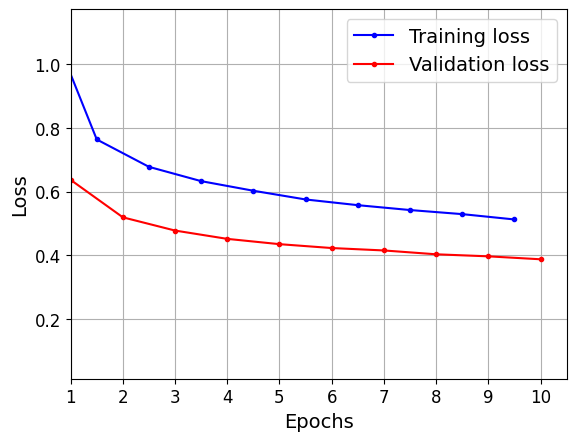

In [6]:
def plot_learning_curves(loss, val_loss):
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.axis([1, len(loss)+0.5, min(loss)-0.5, max(loss)])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [7]:
model.evaluate(X_test, y_test)

  1/313 [..............................] - ETA: 5s - loss: 0.4510 - accuracy: 0.7812

 27/313 [=>............................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8750

 52/313 [===>..........................] - ETA: 0s - loss: 0.4089 - accuracy: 0.8648

 78/313 [======>.......................] - ETA: 0s - loss: 0.3971 - accuracy: 0.8666

103/313 [========>.....................] - ETA: 0s - loss: 0.4233 - accuracy: 0.8562

129/313 [===========>..................] - ETA: 0s - loss: 0.4288 - accuracy: 0.8522

156/313 [=============>................] - ETA: 0s - loss: 0.4205 - accuracy: 0.8546

183/313 [================>.............] - ETA: 0s - loss: 0.4347 - accuracy: 0.8516

210/313 [===================>..........] - ETA: 0s - loss: 0.4330 - accuracy: 0.8507

237/313 [=====================>........] - ETA: 0s - loss: 0.4252 - accuracy: 0.8515

263/313 [========================>.....] - ETA: 0s - loss: 0.4231 - accuracy: 0.8521

290/313 [==========================>...] - ETA: 0s - loss: 0.4270 - accuracy: 0.8499

313/313 [==============================] - 1s 2ms/step - loss: 0.4237 - accuracy: 0.8514


[0.4236517548561096, 0.8514000177383423]